## Telecom Churn Case Study

### Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

### Main Objectives :

-  For many incumbent operators, retaining high profitable customers is the number one business goal.
-  To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### Understanding Customer Behaviour During Churn

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer life cycle :

The ‘good’ phase: In this phase, the customer is happy with the service, usage and behaviour is normal.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months).

## 1. Data Sourcing

In [1]:
# importing all the required libraries for the case study
import pandas as pd
import numpy as np
from numpy import percentile

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import sklearn.preprocessing
import imblearn.over_sampling


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

import statsmodels.api as sma
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

from imblearn.over_sampling import SMOTE #to handle class imbalance

In [2]:
# changing pandas max rows display value to 300 to see large output results
pd.set_option('display.max_rows',300)
pd.set_option('display.max_columns',300)

In [3]:
# Loading the dataset into a data frame
telecom_churn = pd.read_csv('train.csv')
telecom_churn.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [4]:
# checking dimensions of the data set
telecom_churn.shape

(69999, 172)

In [5]:
# detailed information on the data set
telecom_churn.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        69999 non-null  int64  
 1    circle_id                 69999 non-null  int64  
 2    loc_og_t2o_mou            69297 non-null  float64
 3    std_og_t2o_mou            69297 non-null  float64
 4    loc_ic_t2o_mou            69297 non-null  float64
 5    last_date_of_month_6      69999 non-null  object 
 6    last_date_of_month_7      69600 non-null  object 
 7    last_date_of_month_8      69266 non-null  object 
 8    arpu_6                    69999 non-null  float64
 9    arpu_7                    69999 non-null  float64
 10   arpu_8                    69999 non-null  float64
 11   onnet_mou_6               67231 non-null  float64
 12   onnet_mou_7               67312 non-null  float64
 13   onnet_mou_8               66296 non-null  fl

Above information tells us that - 
- we have some null values present in the data
- three types of data columns are there ( integer, float & object)
- We have 70k rows of record and 172 columns.

In [6]:
# numeric type columns details
telecom_churn.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

Above details shows the distribution of numerical column values present in the data set.

In [7]:
# all the columns (features) of the dataset
telecom_churn.columns

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=172)

In [8]:
# integer type columns
cols = telecom_churn.dtypes == 'int64'
int_cols = list(cols[cols].index)
print("Columns with Integer values :")
print(int_cols)
print("----------------------------------------------------------------")

# float type columns
cols = telecom_churn.dtypes == 'float64'
float_cols = list(cols[cols].index)
print("Columns with Float values :")
print(float_cols)
print("----------------------------------------------------------------")

# Categorical type columns
cols = telecom_churn.dtypes == 'object'
object_cols = list(cols[cols].index)
print("Columns with Categorical values :")
print(object_cols)
print("----------------------------------------------------------------")

Columns with Integer values :
['id', 'circle_id', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon', 'churn_probability']
----------------------------------------------------------------
Columns with Float values :
['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'lo

In churn prediction, based on the dataset we observe that KPI (Key Performance Index) calculated on basis of 3 months as follows  :

- Phase 1: Month 6 (June)
- Phase 2: Month 7 (July)
- Phase 3: Month 8 (August)

__To use the model building process on this data set we need to perform Data Cleaning and EDA steps to clean and understand the data behaviours properly.__

## 2. Data Cleaning

In [9]:
# checking total number of null or emply records present in each column of the dataset
round((telecom_churn.isnull().sum() / len(telecom_churn.index))*100,2).sort_values(ascending=False)

arpu_3g_6                   74.90
count_rech_2g_6             74.90
night_pck_user_6            74.90
arpu_2g_6                   74.90
date_of_last_rech_data_6    74.90
total_rech_data_6           74.90
av_rech_amt_data_6          74.90
max_rech_data_6             74.90
count_rech_3g_6             74.90
fb_user_6                   74.90
night_pck_user_7            74.48
date_of_last_rech_data_7    74.48
total_rech_data_7           74.48
max_rech_data_7             74.48
fb_user_7                   74.48
count_rech_2g_7             74.48
count_rech_3g_7             74.48
arpu_3g_7                   74.48
av_rech_amt_data_7          74.48
arpu_2g_7                   74.48
count_rech_2g_8             73.69
av_rech_amt_data_8          73.69
night_pck_user_8            73.69
max_rech_data_8             73.69
total_rech_data_8           73.69
arpu_2g_8                   73.69
arpu_3g_8                   73.69
date_of_last_rech_data_8    73.69
fb_user_8                   73.69
count_rech_3g_

Since there are approx 74-75% null values for average recharge amount, max recharge data and total recharge date and date of data recharge for mobile internet data is missing.

__As we can see last 3 float type columns has month name as part of their name which is in different format as compare to dataset.__ 

__Lets make it similar to other column standard with June as 6, July as 7 and August as 8.__

In [10]:
# mapping the last 3 columns with proper name format
telecom_churn = telecom_churn.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8'})

For Telecom data analysis user's recharge and data usage related columns are important to consider. 

__Filtering out the columns related to recharge amount and data recharge and performing null value imputation.__ 

In [11]:
#derive columns related to recharge
recharge_columns =  telecom_churn.columns[telecom_churn.columns.str.contains('rech_amt|rech_data')]
print(recharge_columns)

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8'],
      dtype='object')


In [12]:
# understanding the value distribution
telecom_churn[recharge_columns].describe(include='all')

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568,17865,18417,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,30,31,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,6/30/2014,7/31/2014,8/31/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,1317,1282,1388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,328.139788,322.376363,323.846355,104.569265,104.137573,107.540351,NaN,NaN,NaN,2.467612,2.679989,2.652441,126.500000,126.402071,125.374925,192.831096,201.455940,196.815792
std,404.211068,411.070120,426.181405,121.407701,120.782543,124.396750,NaN,NaN,NaN,2.794610,3.073472,3.101265,109.352573,109.459266,109.648799,190.623115,198.346141,192.280532
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,110.000000,100.000000,90.000000,30.000000,30.000000,30.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,82.000000,92.000000,84.000000
50%,229.000000,220.000000,225.000000,110.000000,110.000000,98.000000,NaN,NaN,NaN,1.000000,2.000000,1.000000,145.000000,145.000000,145.000000,154.000000,154.000000,154.000000
75%,438.000000,430.000000,436.000000,120.000000,128.000000,144.000000,NaN,NaN,NaN,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,252.000000,252.000000,252.000000


In [13]:
# checking null value count in recharge related columns
telecom_churn[recharge_columns].isnull().sum()

total_rech_amt_6                0
total_rech_amt_7                0
total_rech_amt_8                0
max_rech_amt_6                  0
max_rech_amt_7                  0
max_rech_amt_8                  0
date_of_last_rech_data_6    52431
date_of_last_rech_data_7    52134
date_of_last_rech_data_8    51582
total_rech_data_6           52431
total_rech_data_7           52134
total_rech_data_8           51582
max_rech_data_6             52431
max_rech_data_7             52134
max_rech_data_8             51582
av_rech_amt_data_6          52431
av_rech_amt_data_7          52134
av_rech_amt_data_8          51582
dtype: int64

__From the above observations we can see that there is more that 50k null values present in some of the recharge related columns.We can check if there are any values where total_rech_data is NA and value is present for av_rech_amt_data and vice versa.__

In [14]:
# check how many is NA
data_discripency_6 = telecom_churn['av_rech_amt_data_6'] == np.nan
data_discripency_7 = telecom_churn['av_rech_amt_data_7'] == np.nan
data_discripency_8 = telecom_churn['av_rech_amt_data_7'] == np.nan

# check if any value is present for these rows 
print(telecom_churn.loc[data_discripency_6,'total_rech_data_6'].sum())
print(telecom_churn.loc[data_discripency_7,'total_rech_data_7'].sum())
print(telecom_churn.loc[data_discripency_8,'total_rech_data_8'].sum())

# check how many is NA
data_discripency_6 = telecom_churn['total_rech_data_6'] == np.nan 
data_discripency_7 = telecom_churn['total_rech_data_7'] == np.nan 
data_discripency_8 = telecom_churn['total_rech_data_8'] == np.nan 

# check if any value is present for these rows 
print(telecom_churn.loc[data_discripency_6,'av_rech_amt_data_6'].sum())
print(telecom_churn.loc[data_discripency_7,'av_rech_amt_data_7'].sum())
print(telecom_churn.loc[data_discripency_8,'av_rech_amt_data_8'].sum())

0.0
0.0
0.0
0.0
0.0
0.0


__Result returns Zero, which signifies that if data or amount recharge data is missing for a particular record similarly total and average recharge data is also missing for those days. Either data is not recorded or used doesn't recharge anything.__

__From the above analysis we observed that mostly for recharge columns min value 1, so for those missing records we can impute the values with zero(0) which signifies no recharge done.__

In [15]:
# recharge columns to impute zero
columns_recharge_impute = ['total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8','av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8']

#imputing recharge columns with Zero where value is missing
telecom_churn[columns_recharge_impute] = telecom_churn[columns_recharge_impute].apply(lambda x: x.fillna(0))

In [16]:
telecom_churn[recharge_columns].isnull().sum()

total_rech_amt_6                0
total_rech_amt_7                0
total_rech_amt_8                0
max_rech_amt_6                  0
max_rech_amt_7                  0
max_rech_amt_8                  0
date_of_last_rech_data_6    52431
date_of_last_rech_data_7    52134
date_of_last_rech_data_8    51582
total_rech_data_6               0
total_rech_data_7               0
total_rech_data_8               0
max_rech_data_6                 0
max_rech_data_7                 0
max_rech_data_8                 0
av_rech_amt_data_6              0
av_rech_amt_data_7              0
av_rech_amt_data_8              0
dtype: int64

__Except the date columns now all the columns are not-null.__

- Checking number of unique values present in each columns

In [17]:
# unique values in each column
telecom_churn.nunique().sort_values(ascending=False)

id                          69999
arpu_6                      61615
arpu_7                      61425
arpu_8                      60194
total_og_mou_7              33195
total_og_mou_6              33135
total_og_mou_8              32897
total_ic_mou_6              27432
total_ic_mou_7              27418
total_ic_mou_8              27318
offnet_mou_6                26254
offnet_mou_7                26139
offnet_mou_8                25995
loc_ic_mou_6                24442
loc_ic_mou_7                24258
loc_ic_mou_8                24182
loc_og_mou_6                22309
std_og_mou_7                22088
loc_og_mou_7                22012
loc_og_mou_8                21950
std_og_mou_6                21837
std_og_mou_8                21745
onnet_mou_7                 20076
onnet_mou_6                 20057
onnet_mou_8                 19725
loc_ic_t2m_mou_6            19034
loc_ic_t2m_mou_8            19022
loc_ic_t2m_mou_7            18945
loc_og_t2m_mou_6            17848
loc_og_t2m_mou

1. __"circle_id" only have one unique value, which is not useful in case of analysis, so we can drop the columns.__
2. __columns related to date contains certain percentage of null values, also date columns will not play any major part in out analysis so we can drop those columns.__
3. __'id' column is used for only unique identification for each record, which don't have any impact in analysis, so we will drop it as well.__

In [18]:
# Dropping the following columns mentioned above

id_col = ["circle_id","id"] ## id and circle_id

date_cols = object_cols ## date related columns

telecom_churn = telecom_churn.drop(id_col + date_cols, axis=1)

In [19]:
telecom_churn.shape

(69999, 161)

__We have dropped 11 columns from the dataset, now we have 161 features for further processing.__

In [20]:
df_null_values = round((telecom_churn.isnull().sum() / len(telecom_churn.index))*100,2).sort_values(ascending=False)
df_null_values[df_null_values>0]

night_pck_user_6    74.90
fb_user_6           74.90
count_rech_3g_6     74.90
count_rech_2g_6     74.90
arpu_3g_6           74.90
arpu_2g_6           74.90
count_rech_2g_7     74.48
arpu_3g_7           74.48
fb_user_7           74.48
night_pck_user_7    74.48
arpu_2g_7           74.48
count_rech_3g_7     74.48
arpu_3g_8           73.69
arpu_2g_8           73.69
count_rech_3g_8     73.69
count_rech_2g_8     73.69
night_pck_user_8    73.69
fb_user_8           73.69
isd_og_mou_8         5.29
loc_ic_t2t_mou_8     5.29
std_og_t2c_mou_8     5.29
spl_og_mou_8         5.29
og_others_8          5.29
std_og_mou_8         5.29
std_ic_t2o_mou_8     5.29
loc_ic_t2m_mou_8     5.29
loc_ic_t2f_mou_8     5.29
loc_ic_mou_8         5.29
std_ic_t2t_mou_8     5.29
std_ic_t2m_mou_8     5.29
std_og_t2m_mou_8     5.29
std_ic_mou_8         5.29
spl_ic_mou_8         5.29
isd_ic_mou_8         5.29
ic_others_8          5.29
std_og_t2f_mou_8     5.29
std_ic_t2f_mou_8     5.29
roam_og_mou_8        5.29
std_og_t2t_m

In [21]:
telecom_churn['night_pck_user_8'].value_counts()

0.0    18030
1.0      387
Name: night_pck_user_8, dtype: int64

In [22]:
telecom_churn['fb_user_7'].value_counts()

1.0    16249
0.0     1616
Name: fb_user_7, dtype: int64

__From above results, we observe "fb_user" and "night_pck_user" are categorical type pf columns where 0 means not usage and 1 means usage. Now columns under following category contains many NaN values,we can impute those with -1 values which implies there is no record for those entries.__

In [23]:
categry_cols =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']

# replace missing values with '-1' in categorical columns
telecom_churn[categry_cols] = telecom_churn[categry_cols].apply(lambda x: x.fillna(-1))

In [24]:
#all the null values imputed
telecom_churn[categry_cols].isnull().sum()

night_pck_user_6    0
night_pck_user_7    0
night_pck_user_8    0
fb_user_6           0
fb_user_7           0
fb_user_8           0
dtype: int64

From below missing values percentage count we observed that there are many columns having more than 70% missing records present.

In [25]:
df_null_values = round((telecom_churn.isnull().sum() / len(telecom_churn.index))*100,2).sort_values(ascending=False)

columns_more_than_threshold = df_null_values[df_null_values>70.00]
columns_more_than_threshold

count_rech_3g_6    74.90
arpu_2g_6          74.90
count_rech_2g_6    74.90
arpu_3g_6          74.90
arpu_2g_7          74.48
count_rech_2g_7    74.48
count_rech_3g_7    74.48
arpu_3g_7          74.48
arpu_3g_8          73.69
count_rech_2g_8    73.69
count_rech_3g_8    73.69
arpu_2g_8          73.69
dtype: float64

__Following columns holds the data related to 2G and 3G data usage and recharge details, which is important part of customer usage,So instead of dropping these high null value columns we will be imputing them with Zero values.__ 

__Now we will impute the rest of the columns having missing values with zero, except categorical and date type columns.__

In [26]:
# imputing the respective null columns as 0. 
telecom_churn[telecom_churn.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()] = telecom_churn[telecom_churn.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()].fillna(0, axis=1)

In [27]:
round((telecom_churn.isnull().sum() / len(telecom_churn.index))*100,2).sort_values(ascending=False)

loc_og_t2o_mou        0.0
std_ic_t2o_mou_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
last_day_rch_amt_6    0.0
last_day_rch_amt_7    0.0
last_day_rch_amt_8    0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
count_rech_2g_6       0.0
count_rech_2g_7       0.0
count_rech_2g_8       0.0
total_rech_amt_6      0.0
total_rech_num_8      0.0
total_rech_num_7      0.0
spl_ic_mou_6          0.0
std_ic_t2o_mou_8      0.0
std_ic_mou_6          0.0
std_ic_mou_7          0.0
std_ic_mou_8          0.0
total_ic_mou_6        0.0
total_ic_mou_7        0.0
total_ic_mou_8        0.0
spl_ic_mou_7          0.0
total_rech_num_6      0.0
spl_ic_mou_8          0.0
isd_ic_mou_6          0.0
isd_ic_mou_7          0.0
isd_ic_mou_8          0.0
ic_others_6           0.0
ic_others_7           0.0
ic_others_8 

__Now we have imputed all the missing values in the data.__

### 3. Feature Engineering

- __As per business objective, company mostly emphasize on to find the churn probability amongst the "high-valued" customers of that company, which will help in that company future plans.__

__Based on the available features let's derive the high-values customer details from the data.__

Filtering columns related to recharge details.

In [28]:
# Observing recharge columns
recharge = telecom_churn.columns[telecom_churn.columns.str.contains('rech_amt|rech_data')]
recharge

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'],
      dtype='object')

In [29]:
telecom_churn.loc[:,recharge].describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,328.139788,322.376363,323.846355,104.569265,104.137573,107.540351,0.619309,0.683981,0.697867,31.748339,32.260075,32.986614,48.395787,51.415168,51.782975
std,404.211068,411.070120,426.181405,121.407701,120.782543,124.396750,1.762010,1.943193,1.973434,77.519536,78.069163,78.808337,126.923180,133.246541,131.291162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,110.000000,100.000000,90.000000,30.000000,30.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,229.000000,220.000000,225.000000,110.000000,110.000000,98.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,438.000000,430.000000,436.000000,120.000000,128.000000,144.000000,1.000000,1.000000,1.000000,8.000000,14.000000,17.000000,8.000000,17.000000,23.000000
max,35190.000000,40335.000000,45320.000000,4010.000000,3299.000000,4449.000000,61.000000,54.000000,60.000000,1555.000000,1555.000000,1555.000000,5920.000000,4365.000000,4076.000000


In [30]:
# Verifying percentage of null values in recharge based columns
100*telecom_churn.loc[:,recharge].isnull().sum()/len(telecom_churn)

total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
dtype: float64

Following columns don't have any null values present.

__Deriving the new columns for recharge related data__

__1. total_data_recharged = total_recharge_data + av_recharge_amount_data__

In [31]:
# for the month of June, July and August
telecom_churn['total_data_recharged_6'] = telecom_churn.total_rech_data_6 * telecom_churn.av_rech_amt_data_6
telecom_churn['total_data_recharged_7'] = telecom_churn.total_rech_data_7 * telecom_churn.av_rech_amt_data_7
telecom_churn['total_data_recharged_8'] = telecom_churn.total_rech_data_8 * telecom_churn.av_rech_amt_data_8

__2. amount_of_data = total_recharge_amount + total_data_recharged__

In [32]:
# Total recharge amount for June,July and August
telecom_churn['amt_data_6'] = telecom_churn.total_rech_amt_6 + telecom_churn.total_data_recharged_6
telecom_churn['amt_data_7'] = telecom_churn.total_rech_amt_7 + telecom_churn.total_data_recharged_7
telecom_churn['amt_data_8'] = telecom_churn.total_rech_amt_8 + telecom_churn.total_data_recharged_8

__3. Average recharge amount date (June-July) = total amount/2__ 

In [33]:
# average recharge done by customer in June and July
telecom_churn['av_amt_data_6_7'] = (telecom_churn.amt_data_6 + telecom_churn.amt_data_7)/2

In [34]:
telecom_churn[['av_amt_data_6_7', 'total_data_recharged_6', 'total_data_recharged_7','total_data_recharged_8', 'amt_data_6', 'amt_data_7','amt_data_8']].head()

,av_amt_data_6_7,total_data_recharged_6,total_data_recharged_7,total_data_recharged_8,amt_data_6,amt_data_7,amt_data_8
0,71.0,0.0,0.0,0.0,77.0,65.0,10.0
1,145.0,0.0,145.0,0.0,0.0,290.0,50.0
2,95.0,0.0,0.0,0.0,70.0,120.0,0.0
3,200.0,0.0,0.0,0.0,160.0,240.0,130.0
4,1494.0,1225.0,1337.0,852.0,1515.0,1473.0,974.0


__Filtering high-value customers based on average amount spend by them. Lets consider high-valued customers are those who :__

-  __have recharged with an amount more than or equal to X, where X is the 60th percentile of the average recharge amount in the first two months (June,July).__

In [35]:
# 60th percentile of recharge amount
print("Recharge amount at 60th percentile: {0}".format(telecom_churn.av_amt_data_6_7.quantile(0.6)))

Recharge amount at 60th percentile: 361.0


In [36]:
# Extracting High value customers where total average recharge amount for good phase > 60th percentile
high_value_cust = telecom_churn.loc[telecom_churn.av_amt_data_6_7 > telecom_churn.av_amt_data_6_7.quantile(0.6), :]
high_value_cust = high_value_cust.reset_index(drop=True)
high_value_cust.shape

(27995, 168)

We can see no of rows is reduced from 69999 to 27995 , due to high-valued customer filtering.

__Our new sub-set of high value customer is derived from the main dataset. Contains 168 columns and 27995 records.__

In [37]:
# print churn ratio amongst high value customers
print("Churn Ratio:")
print(high_value_cust.churn_probability.value_counts()*100/high_value_cust.shape[0])

Churn Ratio:
0    91.323451
1     8.676549
Name: churn_probability, dtype: float64


###  We see that approx. 8.7% of high value customers have tendency to churn.

To understand the customer behaviour or trend, we will derive some columns based on difference of values between first two months (June and July) with Third Month (August).

- __If such columns going to have negative values, it will imply that usage of following factor is decreased in month of August compare to June and July. That means there change is customer behaviour and it shows possibility of churn.__

Lets derive few of those columns :

In [38]:
# data and network usage related columns

high_value_cust['arpu_diff'] = high_value_cust.arpu_8 - ((high_value_cust.arpu_6 + high_value_cust.arpu_7)/2)

high_value_cust['onnet_mou_diff'] = high_value_cust.onnet_mou_8 - ((high_value_cust.onnet_mou_6 + high_value_cust.onnet_mou_7)/2)

high_value_cust['offnet_mou_diff'] = high_value_cust.offnet_mou_8 - ((high_value_cust.offnet_mou_6 + high_value_cust.offnet_mou_7)/2)

high_value_cust['roam_ic_mou_diff'] = high_value_cust.roam_ic_mou_8 - ((high_value_cust.roam_ic_mou_6 + high_value_cust.roam_ic_mou_7)/2)

high_value_cust['roam_og_mou_diff'] = high_value_cust.roam_og_mou_8 - ((high_value_cust.roam_og_mou_6 + high_value_cust.roam_og_mou_7)/2)

In [39]:
# diff calling type related columns incoming and outgoing

high_value_cust['loc_og_mou_diff'] = high_value_cust.loc_og_mou_8 - ((high_value_cust.loc_og_mou_6 + high_value_cust.loc_og_mou_7)/2)

high_value_cust['std_og_mou_diff'] = high_value_cust.std_og_mou_8 - ((high_value_cust.std_og_mou_6 + high_value_cust.std_og_mou_7)/2)

high_value_cust['isd_og_mou_diff'] = high_value_cust.isd_og_mou_8 - ((high_value_cust.isd_og_mou_6 + high_value_cust.isd_og_mou_7)/2)

high_value_cust['spl_og_mou_diff'] = high_value_cust.spl_og_mou_8 - ((high_value_cust.spl_og_mou_6 + high_value_cust.spl_og_mou_7)/2)

high_value_cust['total_og_mou_diff'] = high_value_cust.total_og_mou_8 - ((high_value_cust.total_og_mou_6 + high_value_cust.total_og_mou_7)/2)

high_value_cust['loc_ic_mou_diff'] = high_value_cust.loc_ic_mou_8 - ((high_value_cust.loc_ic_mou_6 + high_value_cust.loc_ic_mou_7)/2)

high_value_cust['std_ic_mou_diff'] = high_value_cust.std_ic_mou_8 - ((high_value_cust.std_ic_mou_6 + high_value_cust.std_ic_mou_7)/2)

high_value_cust['isd_ic_mou_diff'] = high_value_cust.isd_ic_mou_8 - ((high_value_cust.isd_ic_mou_6 + high_value_cust.isd_ic_mou_7)/2)

high_value_cust['spl_ic_mou_diff'] = high_value_cust.spl_ic_mou_8 - ((high_value_cust.spl_ic_mou_6 + high_value_cust.spl_ic_mou_7)/2)

high_value_cust['total_ic_mou_diff'] = high_value_cust.total_ic_mou_8 - ((high_value_cust.total_ic_mou_6 + high_value_cust.total_ic_mou_7)/2)

In [40]:
# diff date recharge and recharge related  columns

high_value_cust['total_rech_num_diff'] = high_value_cust.total_rech_num_8 - ((high_value_cust.total_rech_num_6 + high_value_cust.total_rech_num_7)/2)

high_value_cust['total_rech_amt_diff'] = high_value_cust.total_rech_amt_8 - ((high_value_cust.total_rech_amt_6 + high_value_cust.total_rech_amt_7)/2)

high_value_cust['max_rech_amt_diff'] = high_value_cust.max_rech_amt_8 - ((high_value_cust.max_rech_amt_6 + high_value_cust.max_rech_amt_7)/2)

high_value_cust['total_rech_data_diff'] = high_value_cust.total_rech_data_8 - ((high_value_cust.total_rech_data_6 + high_value_cust.total_rech_data_7)/2)

high_value_cust['max_rech_data_diff'] = high_value_cust.max_rech_data_8 - ((high_value_cust.max_rech_data_6 + high_value_cust.max_rech_data_7)/2)

high_value_cust['av_rech_amt_data_diff'] = high_value_cust.av_rech_amt_data_8 - ((high_value_cust.av_rech_amt_data_6 + high_value_cust.av_rech_amt_data_7)/2)

high_value_cust['vol_2g_mb_diff'] = high_value_cust.vol_2g_mb_8 - ((high_value_cust.vol_2g_mb_6 + high_value_cust.vol_2g_mb_7)/2)

high_value_cust['vol_3g_mb_diff'] = high_value_cust.vol_3g_mb_8 - ((high_value_cust.vol_3g_mb_6 + high_value_cust.vol_3g_mb_7)/2)

In [41]:
high_value_cust.shape

(27995, 191)

Now we have added few more derived columns or features, with total column count increased to 191.

In [42]:
# checking value distribution of high value customers
high_value_cust.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn_probability,total_data_recharged_6,total_data_recharged_7,total_data_recharged_8,amt_data_6,amt_data_7,amt_data_8,av_amt_data_6_7,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,27995.0,27995.0,27995.0,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.0,27995.0,27995.0,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.00000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.0,27995.0,27995.0,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,2

It shows there is outliers present in almost all the numerical value columns, which we will be handling in later steps.

In [43]:
high_value_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27995 entries, 0 to 27994
Columns: 191 entries, loc_og_t2o_mou to vol_3g_mb_diff
dtypes: float64(165), int64(26)
memory usage: 40.8 MB


## 4. EDA / Data Visualization

__Checking all the columns and its counts of unique values present.__

In [44]:
#List of columns with only 1 unqiue value
col_list = high_value_cust.loc[:,high_value_cust.apply(pd.Series.nunique) == 1]
col_list.head(5)

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


__Above columns contains only one unique value, which will don't have any impact on the data analysis part. So, dropping the columns with only one unique value present.__

In [45]:
# dropping the one unique value columns
high_value_cust = high_value_cust.loc[:,high_value_cust.apply(pd.Series.nunique) != 1]
high_value_cust.shape

(27995, 182)

In [46]:
num_cols = high_value_cust.select_dtypes(exclude=['object']).columns
num_cols

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'spl_ic_mou_diff', 'total_ic_mou_diff', 'total_rech_num_diff',
       'total_rech_amt_diff', 'max_rech_amt_diff', 'total_rech_data_diff',
       'max_rech_data_diff', 'av_rech_amt_data_diff', 'vol_2g_mb_diff',
       'vol_3g_mb_diff'],
      dtype='object', length=182)

All the columns are type of numeric.

__Plotting some Box Plots on recharge amount and data related columns to understand the trend :__

In [47]:
# create box plot for  6th, 7th and 8th month
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = high_value_cust
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="churn_probability",hue="churn_probability",showfliers=False)
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="churn_probability",hue="churn_probability",showfliers=False)
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="churn_probability",hue="churn_probability",showfliers=False)
    plt.show()

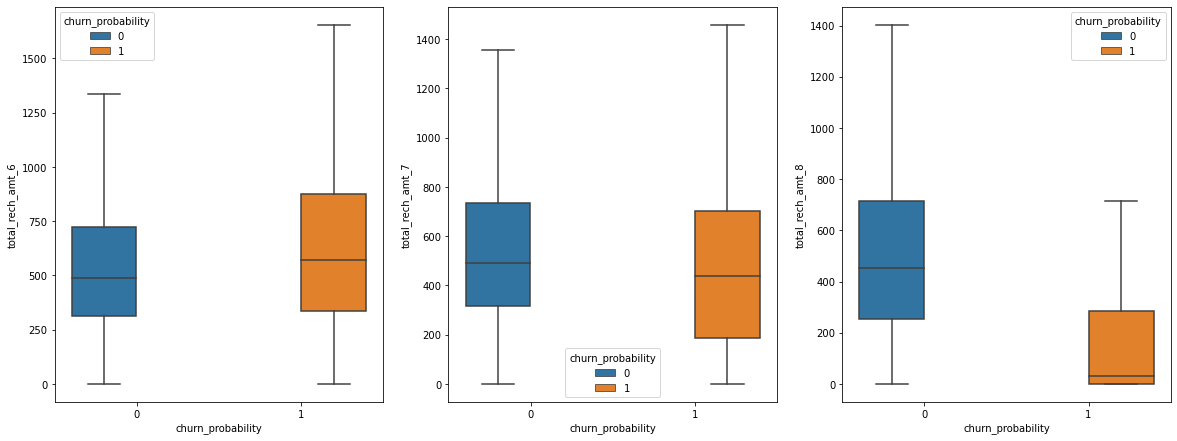

In [48]:
# Ploting for total recharge amount:
plot_box_chart('total_rech_amt')

- __Total recharge amount for month of August is less compare to first two months in case of Churn.__

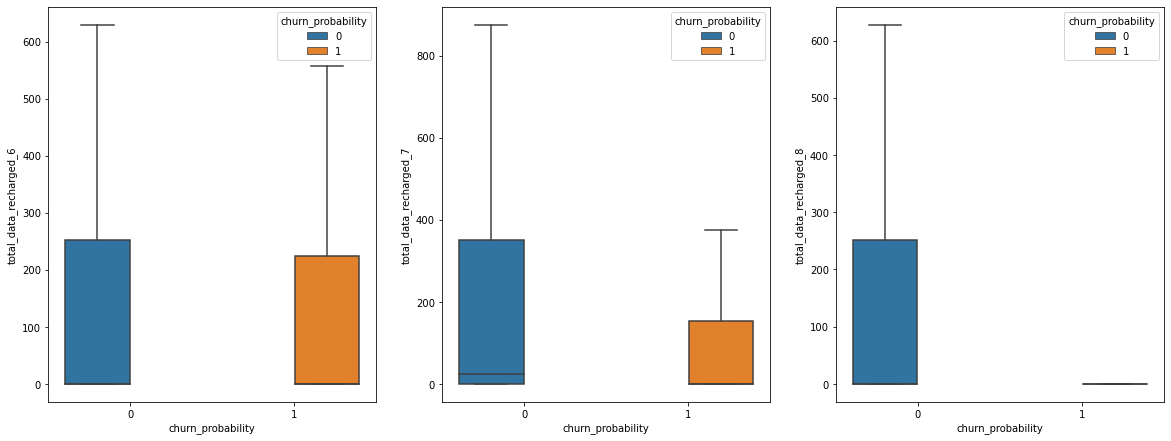

In [49]:
# Ploting for total data recharged:
plot_box_chart('total_data_recharged')

- __Total data recharged for month of August is very less compare to first two months in case of Churn.__

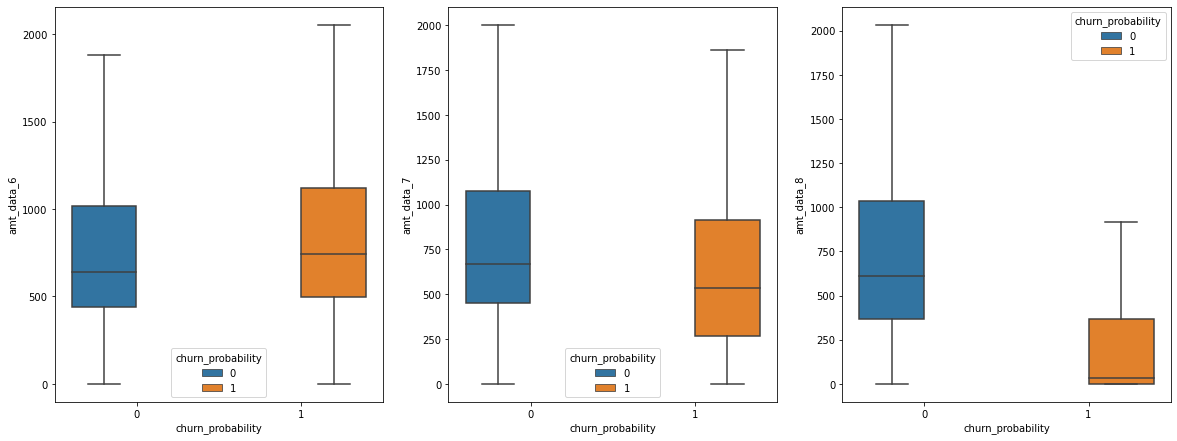

In [50]:
# Ploting for total recharge amount:
plot_box_chart('amt_data')

- __Amount of data consumed for month of August is less compare to first two months in case of Churn.__

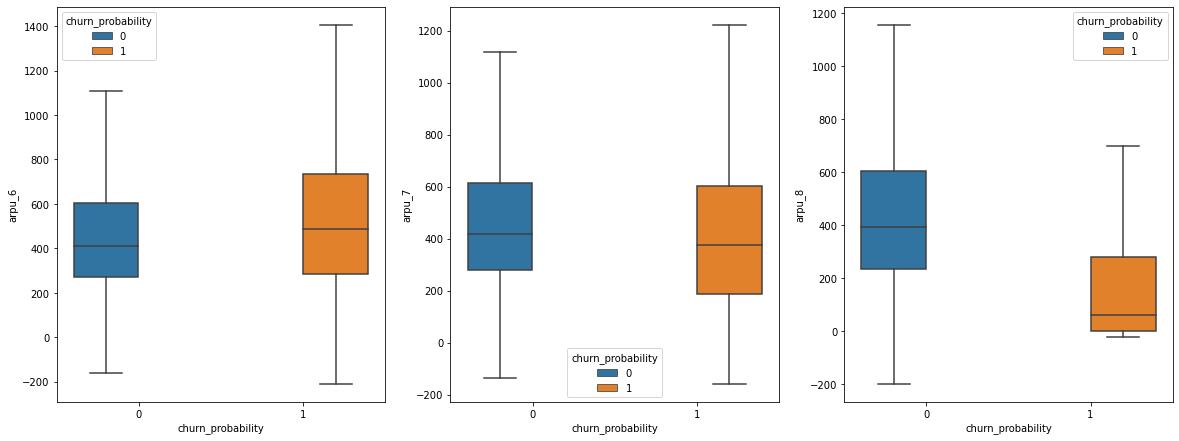

In [51]:
# Ploting for total recharge amount:
plot_box_chart('arpu')

- __Average revenue per user for month of August is less compare to first two months in case of Churn.__

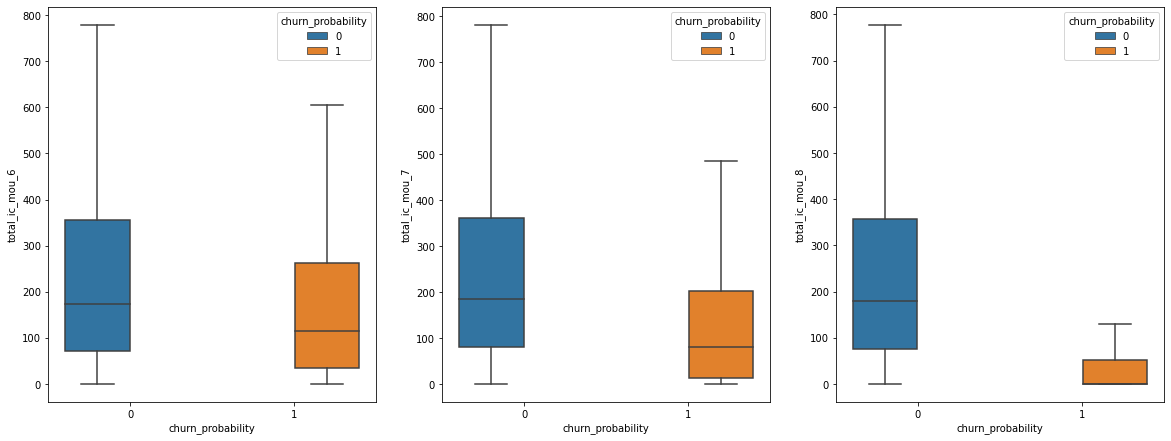

In [52]:
# Ploting for total recharge amount:
plot_box_chart('total_ic_mou')

- __Total minutes of usage of incoming voice calls for month of August is very less compare to first two months in case of Churn.__

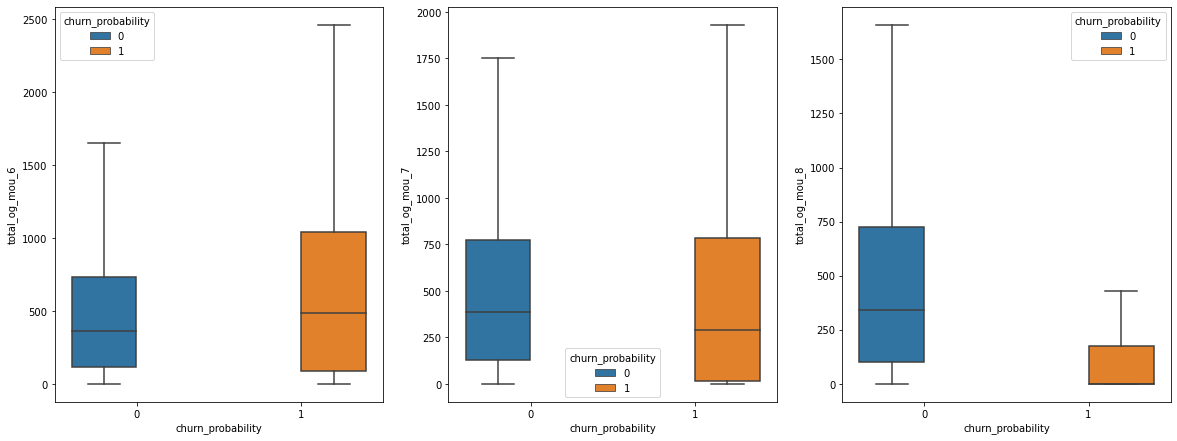

In [53]:
# Ploting for total recharge amount:
plot_box_chart('total_og_mou')

- __Total minutes of usage of outgoing voice calls for month of August is very less compare to first two months in case of Churn.__

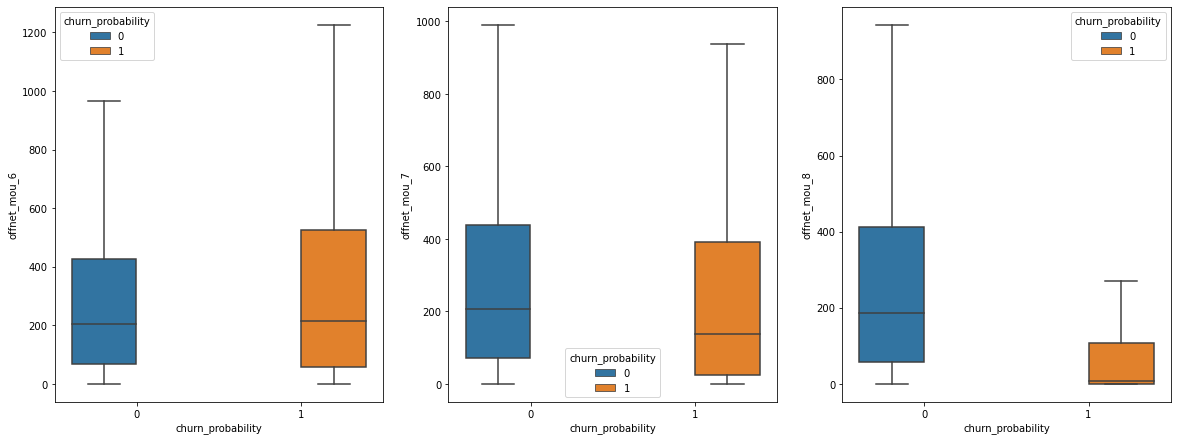

In [54]:
# Ploting for total recharge amount:
plot_box_chart('offnet_mou')

- __Total minutes of usage of voice calls outside operator network for month of August is less compare to first two months in case of Churn.__

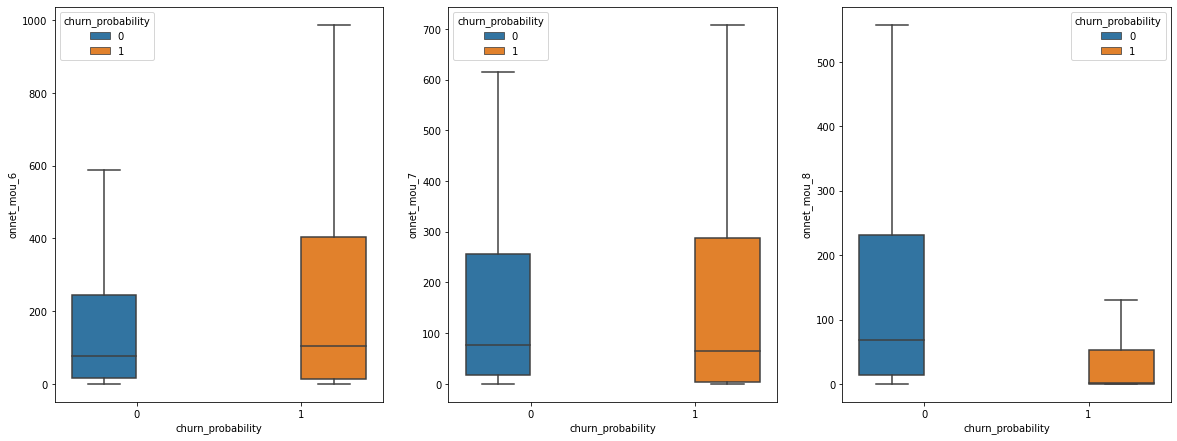

In [55]:
# Ploting for total recharge amount:
plot_box_chart('onnet_mou')

- __Total minutes of usage of voice calls within operator network for month of August is less compare to first two months in case of Churn.__

Filtering the derived columns calculated based on difference in values between August and Jun-Jul :

In [56]:
differentiation_cols = high_value_cust.columns[high_value_cust.columns.str.contains('.*_diff',regex=True)]
differentiation_cols

Index(['arpu_diff', 'onnet_mou_diff', 'offnet_mou_diff', 'roam_ic_mou_diff',
       'roam_og_mou_diff', 'loc_og_mou_diff', 'std_og_mou_diff',
       'isd_og_mou_diff', 'spl_og_mou_diff', 'total_og_mou_diff',
       'loc_ic_mou_diff', 'std_ic_mou_diff', 'isd_ic_mou_diff',
       'spl_ic_mou_diff', 'total_ic_mou_diff', 'total_rech_num_diff',
       'total_rech_amt_diff', 'max_rech_amt_diff', 'total_rech_data_diff',
       'max_rech_data_diff', 'av_rech_amt_data_diff', 'vol_2g_mb_diff',
       'vol_3g_mb_diff'],
      dtype='object')

__Plotting the derived difference columns based on Churn and Not Churn values to understand the trend :__

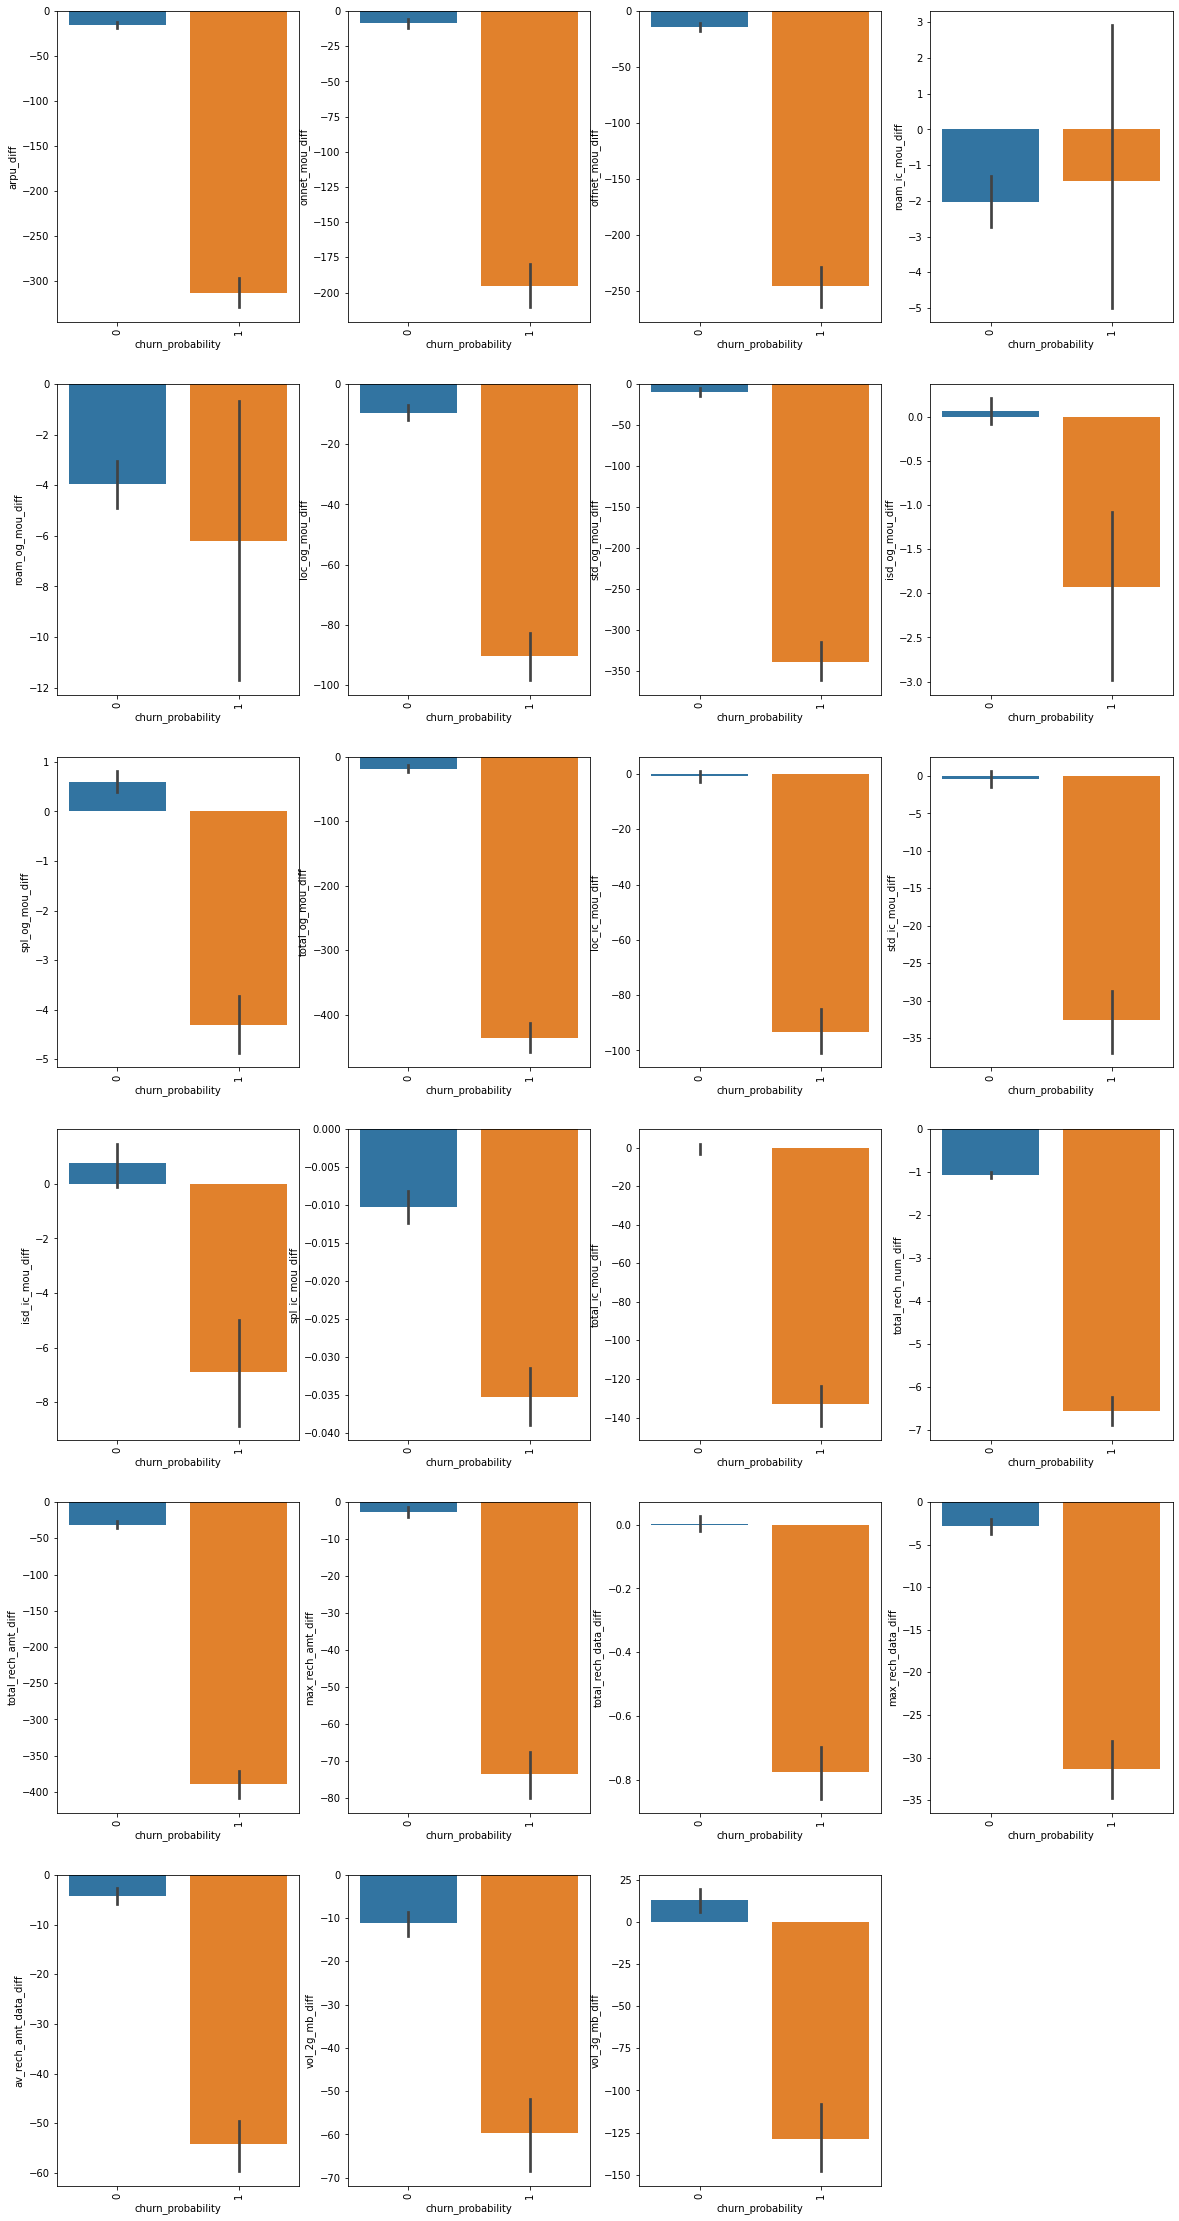

In [57]:
# plotting columns based on churn lables
plt.figure(figsize=(20,40))
plt.title("Categorial feature values plotted on bar graph")
plt.xticks(rotation=90)
index =1 
for col in differentiation_cols:
    plt.subplot(6,4,index)
    plt.xticks(rotation=90)
    sns.barplot(x='churn_probability',y=col,data=high_value_cust)
    index+=1

__Analysis based on above observations:__

-  __In case of churn almost every features shows higher negative trends than not churn .__
-  __Negative trend implies that average value of June and July is higher than August .__
-  __Call, recharge and data usage significantly drops in the month of August.__
-  __After 3 months customer has gain tendency to Churn which is clearly visible in the data.__

__Analysis of Churn and Non Churn based on Customer tenure:__

In [58]:
# converting tenture in shorter durations
service_tenure = high_value_cust.copy()
service_tenure['tenure'] = service_tenure['aon']/30

In [59]:
# mapping the tenures with categorical values
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
service_tenure['tenure_range'] = pd.cut(service_tenure['tenure'], tn_range, labels=tn_label)
service_tenure['tenure_range'].head()

0        1-2 Yrs
1        1-2 Yrs
2    6-12 Months
3        1-2 Yrs
4            NaN
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

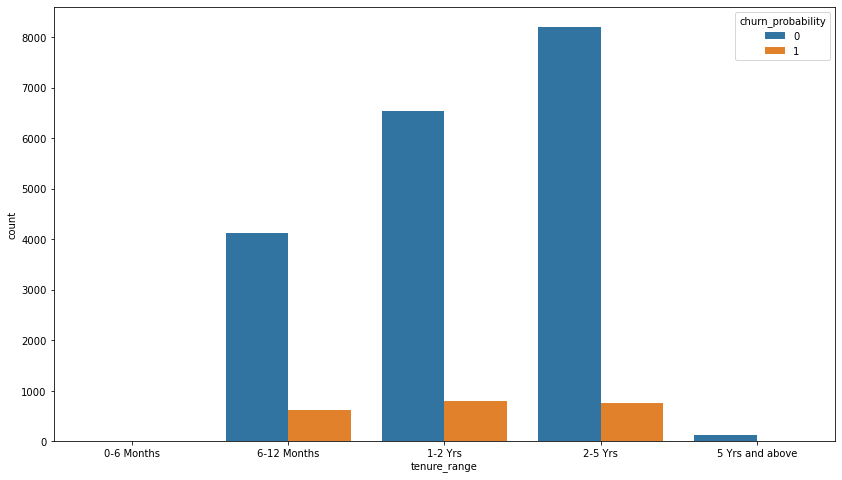

In [60]:
# tenure vs churn probability
plt.figure(figsize=(14,8))
sns.countplot(x = 'tenure_range', hue = 'churn_probability',data = service_tenure)
plt.show()

__Above analysis shows that :__

- __In initial 6 months or after 5 months there is no churn, either user stopped using the services or used was not using services.__
- __Churn probability is higher in 2-5 years tenure.__

In [61]:
# Correlation of all the features in the data set
correlation = high_value_cust.corr()
correlation

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn_probability,total_data_recharged_6,total_data_recharged_7,total_data_recharged_8,amt_data_6,amt_data_7,amt_data_8,av_amt_data_6_7,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
arpu_6,1.000000,0.690771,0.619548,0.353751,0.220120,0.191239,0.517427,0.341274,0.283197,0.130974,0.080326,0.077635,0.207647,0.144690,0.120621,0.171804,0.132610,0.131411,0.333157,0.247895,0.217971,0.144426,0.117193,0.111509,0.046820,0.011009,0.008973,0.328874,0.247839,0.226049,0.283090,0.162946,0.134792,0.301704,0.174871,0.131398,0.068731,0.051433,0.043093,0.391254,0.226741,0.177354,0.489355,0.453183,0.439548,0.113976,0.063355,0.040640,0.053720,0.003166,0.000693,0.563271,0.365162,0.303165,0.084572,0.060567,0.061016,0.186429,0.146459,0.122330,0.054421,0.037537,0.037418,0.180125,0.137594,0.121595,0.095279,0.058840,0.054548,0.095688,0.065465,0.061201,0.035087,0.032868,0.024178,0.126005,0.083193,0.076472,0.223410,0.163983,0.146641,0.032307,-0.049039,-0.018839,0.104507,0.067484,0.071028,0.017677,0.029318,0.009742,0.367649,0.143797,0.124998,0.946943,0.669287,0.610227,0.328279,0.258529,0.271904,0.267054,0.224534,0.170734,-0.052869,-0.114262,-0.075876,0.098827,0.006382,0.049673,-0.113128,-0.153265,-0.118199,0.113304,0.048599,0.056387,0.140233,0.016510,0.059991,-0.037653,-0.078799,-0.059782,0.164829,0.093304,0.102457,0.257468,0.143546,0.156085,0.226496,0.118972,0.136253,-0.048610,-0.128879,-0.064247,-0.026530,-0.074233,-0.053864,-0.108445,-0.140425,-0.109463,0.186394,0.098538,0.116304,0.019981

#### Treating the Outliers

Using capping factors (mean and standard deviation) to treat the outliers present in the data

In [62]:
# defining capping upper and lower limits
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [63]:
cols = high_value_cust.columns.to_list()
cols


['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

In [64]:
# removing prediction column from the outlier treatment
cols.remove('churn_probability')
cols

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

In [65]:
# treating outliers in the numeric columns
high_value_cust[cols] = high_value_cust[cols].apply(cap_outliers, axis=0)

In [66]:
high_value_cust[num_cols].shape

(27995, 182)

In [67]:
# checking columns values after outlier capping
high_value_cust.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn_probability,total_data_recharged_6,total_data_recharged_7,total_data_recharged_8,amt_data_6,amt_data_7,amt_data_8,av_amt_data_6_7,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.000000,27995.00000

__Now for all the numerical columns 98-99 percentiles values are less differing from max values. So, outliers are treated in the data.__

__Distribution plot of Average revenue per user in month of June, July and August__

[Text(0.5, 0, 'ARPU of 3 Months')]

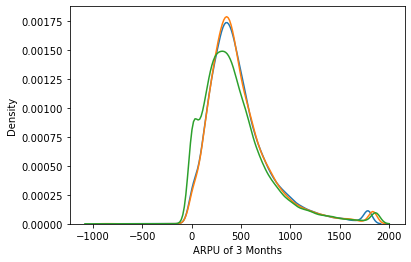

In [68]:
# Distribution plot
ax = sns.distplot(high_value_cust['arpu_6'],label='june',hist=False)
ax = sns.distplot(high_value_cust['arpu_7'],label='july',hist=False)
ax = sns.distplot(high_value_cust['arpu_8'],label='august',hist=False)
ax.set(xlabel='ARPU of 3 Months')

Distribution plot of Total outgoing voice call minutes of usage per user in month of June, July and August

[Text(0.5, 0, 'Minutes of Usage outgoing calls')]

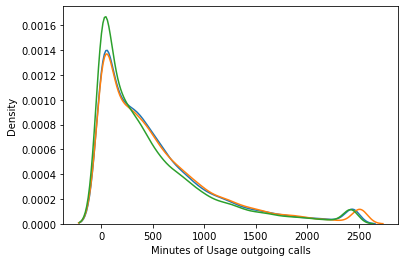

In [69]:
# Distribution plot
ax = sns.distplot(high_value_cust['total_og_mou_6'],label='june',hist=False)
ax = sns.distplot(high_value_cust['total_og_mou_7'],label='july',hist=False)
ax = sns.distplot(high_value_cust['total_og_mou_8'],label='august',hist=False)
ax.set(xlabel='Minutes of Usage outgoing calls')

__Distribution plot of Total incoming voice call minutes of usage per user in month of June, July and
August__

[Text(0.5, 0, 'Minutes of Usage incoming calls')]

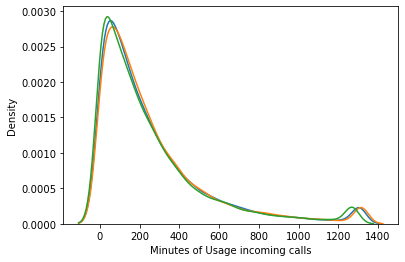

In [70]:
# Distribution plot
ax = sns.distplot(high_value_cust['total_ic_mou_6'],label='june',hist=False)
ax = sns.distplot(high_value_cust['total_ic_mou_7'],label='july',hist=False)
ax = sns.distplot(high_value_cust['total_ic_mou_8'],label='august',hist=False)
ax.set(xlabel='Minutes of Usage incoming calls')

Dropping few derived columns from the dataset which are not required in further analysis:

In [71]:
high_value_cust.drop(["av_amt_data_6_7"],axis=1,inplace=True)

In [72]:
high_value_cust.drop(differentiation_cols,axis=1,inplace=True)

In [73]:
high_value_cust.shape

(27995, 158)

__Creating final dataset for model building, with 27995 records and 158 features including the churn prediction column.__

In [74]:
# final dataset for model building
telecom_churn_final = high_value_cust.copy()
print(telecom_churn_final.shape)
telecom_churn_final.head(5)

(27995, 158)


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn_probability,total_data_recharged_6,total_data_recharged_7,total_data_recharged_8,amt_data_6,amt_data_7,amt_data_8
0,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.0,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.0,9.85,0.0,58.91,25.94,15.76,0.00,0.00,0.00,4.35,0.00,0.00,0.0,0.00,0.00,4.35,0.00,0.00,0.0,0.0,0.0,0.00,17.0,0.00,0.0,0.0,0.0,63.26,42.94,15.76,5.44,1.39,2.66,10.58,4.330000,19.49,5.51,3.63,6.14,21.54,9.36,28.31,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21.54,9.36,28.31,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,10.0,8.0,290.0,136.0,122.0,50.0,41.0,30.0,25.0,10.0,30.0,7.0,7.0,6.0,25.0,41.0,25.0,7.0,6.0,6.0,0.0,1.0,0.0,175.0,191.0,142.0,390.80,308.89,213.47,0.0,0.00,0.0,0.0,35.0,0.0,0.00,35.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,647.0,0.00,0.00,0.00,0,1225.0,1337.0,852.0,1515.0,1473.0,974.0
1,167.861,167.869,167.866,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,11.36,6.04,28.44,13.41,9.160000,8.73,0.00,0.00,4.14,24.78,15.21,41.33,0.00,0.0,0.0,0.00,0.00,0.00,0.33,0.68,2.49,0.33,0.68,2.49,25.11,15.89,43.83,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0,198.0,198.0,198.0,198.0,198.0,198.0,198.0,198.0,0.0,1.0,1.0,1.0,198.0,198.0,198.0,1.0,1.0,1.0,0.0,0.0,0.0,198.0,198.0,198.0,167.53,6.29,5.40,177.9,151.58,271.4,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,584.0,82.26,73.56,177.14,0,198.0,198.0,198.0,396.0,396.0,396.0
2,439.919,397.946,392.024,244.46,108.31,42.98,571.98,727.91,644.43,0.00,0.0,0.0,0.00,0.0,0.0,0.00,7.86,3.98,44.01,13.93,51.24,0.00,0.00

In [75]:
df_null_values = round((telecom_churn_final.isnull().sum() / len(telecom_churn_final.index))*100,2).sort_values(ascending=False)
df_null_values[df_null_values>0]

Series([], dtype: float64)

In [76]:
telecom_churn_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27995 entries, 0 to 27994
Columns: 158 entries, arpu_6 to amt_data_8
dtypes: float64(157), int64(1)
memory usage: 33.7 MB


__Dataset doesn't have any null values with 157 float type column. "telecom_churn_final" we will be using this dataset for model building in next stage.__

### 5. Model Building

Dividing the data set in two parts, X contains all the predictor columns and y contains column that has predicted value.

In [77]:
# lets create X & y dataset for model building, X will obviously not have "churn" and y will only have "churn"
X = telecom_churn_final.drop(['churn_probability'], axis=1)
y = telecom_churn_final['churn_probability']

In [78]:
print("Dimension of X:", X.shape)
print("Dimension of y:", y.shape)

Dimension of X: (27995, 157)
Dimension of y: (27995,)


Splitting the data set in train and test sets for model building

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=100)

In [80]:
print("Dimension of X_train:", X_train.shape)
print("Dimension of y_train:", y_train.shape)

print("Dimension of X_test:", X_test.shape)
print("Dimension of y_test:", y_test.shape)

Dimension of X_train: (22396, 157)
Dimension of y_train: (22396,)
Dimension of X_test: (5599, 157)
Dimension of y_test: (5599,)


#### Scaling the Data

In [81]:
# columns to be scaled
cols_scale = X_train.columns.to_list()
cols_scale

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

We will be using MinMaxScaler scaler to scale the data. Scaler is fitted on only train set and transformed on both train and test sets.

In [82]:
# initializing scaler object
scaler = MinMaxScaler()

# fit transform the scaler on train
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])
# transform test using the already fit scaler
X_test[cols_scale] = scaler.transform(X_test[cols_scale])

In [83]:
X_train.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'aon', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6', 'total_data_recharged_6',
       'total_data_recharged_7', 'total_data_recharged_8', 'amt_data_6',
       'amt_data_7', 'amt_data_8'],
      dtype='object', length=157)

In [84]:
y_train.value_counts()

0    20451
1     1945
Name: churn_probability, dtype: int64

In [85]:
#lets print the stats before sampling
print("counts of label '1':",sum(y_train==1))
print("counts of label '0':",sum(y_train==0))

counts of label '1': 1945
counts of label '0': 20451


In [86]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22396 entries, 12226 to 5640
Columns: 157 entries, arpu_6 to amt_data_8
dtypes: float64(157)
memory usage: 27.0 MB


In the prediction train data set we can see imbalance between churn and non churn records, which will impact the prediction.

__Applying Sampling on the y_train to balance the data__

In [87]:
#perform oversampling using smote

sm = SMOTE(random_state=12)

X_train_smo, y_train_smo = sm.fit_sample(X_train, y_train)

In [88]:
#lets print the stats after sampling
print("counts of label '1':",sum(y_train_smo==1))
print("counts of label '0':",sum(y_train_smo==0))

counts of label '1': 20451
counts of label '0': 20451


Records are now sampled with equal number of values.

In [89]:
X_train_smo.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'aon', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6', 'total_data_recharged_6',
       'total_data_recharged_7', 'total_data_recharged_8', 'amt_data_6',
       'amt_data_7', 'amt_data_8'],
      dtype='object', length=157)

### 5.1 PCA Model 

Starting model building with PCA as we have many features and PCA helps to reduce the dimension of the data.

In [90]:
#lets perform PCA on sampled data
pca = PCA(svd_solver='randomized', random_state=42)

In [91]:
#lets fit PCA on the train dataset
pca.fit(X_train_smo)

PCA(random_state=42, svd_solver='randomized')

All the PCA components after fitting

In [92]:
pca.components_

array([[-0.02569732, -0.01293145,  0.00600993, ...,  0.05224736,
         0.0623968 ,  0.05419498],
       [ 0.07661517,  0.10892559,  0.11782138, ...,  0.02896156,
         0.06627425,  0.08788233],
       [ 0.01440249,  0.04999577,  0.03826527, ...,  0.04300955,
         0.09276982,  0.070599  ],
       ...,
       [-0.0041621 , -0.00035668,  0.00129918, ..., -0.01365422,
        -0.00962094,  0.01637205],
       [ 0.00436923,  0.00079554, -0.00280738, ...,  0.00652301,
         0.00090391, -0.00419433],
       [ 0.00117167, -0.0021616 ,  0.00353768, ...,  0.00503477,
        -0.00434392, -0.00635726]])

In [93]:
pca.explained_variance_ratio_

array([2.15165053e-01, 1.05513863e-01, 7.15674738e-02, 6.67317679e-02,
       4.52120061e-02, 3.52004681e-02, 3.18916133e-02, 2.92596668e-02,
       2.80772674e-02, 2.27584705e-02, 2.08014525e-02, 1.57700424e-02,
       1.37409425e-02, 1.29509380e-02, 1.22306673e-02, 1.14921099e-02,
       1.11577562e-02, 1.00702756e-02, 9.61398488e-03, 9.47156684e-03,
       8.97112995e-03, 8.23823242e-03, 8.19074088e-03, 7.86885280e-03,
       7.58701828e-03, 7.19754636e-03, 6.99566462e-03, 6.52299637e-03,
       6.04574065e-03, 5.82414425e-03, 5.67877302e-03, 5.30282373e-03,
       5.02165129e-03, 4.81901116e-03, 4.61436092e-03, 4.46006630e-03,
       4.29709128e-03, 4.15304074e-03, 4.01388712e-03, 3.87659769e-03,
       3.66167898e-03, 3.58447326e-03, 3.44387478e-03, 3.34597763e-03,
       3.19628361e-03, 3.13970031e-03, 2.98864590e-03, 2.92008172e-03,
       2.88794718e-03, 2.78015319e-03, 2.68057052e-03, 2.47612048e-03,
       2.24036703e-03, 2.17901233e-03, 2.06983911e-03, 2.00443715e-03,
      

Calculation of cumulative sum of explained_variance_ratio

In [94]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

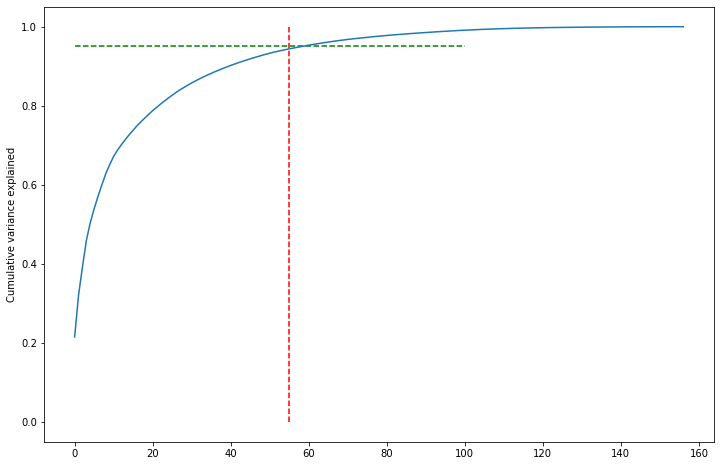

In [95]:
## plotting the Cumulative Variance to find the optimal point
fig = plt.figure(figsize=[12,8])
plt.vlines(x=55, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=100, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

__Above plots shows intersection around X = 55 and Y= 0.95.Implies :__

- __Using 55 components in PCA 95% of variance can be explained.__

__Building the Incremental PCA model using n_components=55__

In [96]:
# building final PCA model
pca_final = IncrementalPCA(n_components=55)

In [97]:
#fit
X_train_pca = pca_final.fit_transform(X_train_smo)
X_train_pca.shape

(40902, 55)

In [98]:
#lets create correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
#correlations are close to 0

max corr: 0.006736413715873722 , min corr:  -0.004698027180316091


__Maximum and Minimum correlation is almost Zero, so we successfully minimizes Multi-Collinearity from the data set using PCA.__

In [99]:
#Applying selected components to the test data - 55 components
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(5599, 55)

Dimension of the data is reduces to 55 features.

### 5.2 Applying Logistic Regression on PCA model

Applying logistic regression to classify Churn and Non Churn on top of PCA model

In [100]:
# initializing logistic regression Model
lr_on_pca = LogisticRegression(class_weight='balanced')

# fitting the train data into the model
lr_on_pca.fit(X_train_pca,y_train_smo)

LogisticRegression(class_weight='balanced')

In [101]:
# prediction on train data
train_predictions = lr_on_pca.predict(X_train_pca)

#prediction probability on train data
train_predprob = lr_on_pca.predict_proba(X_train_pca)[:,1]

In [102]:
# Deriving the Model Scores
print ("Accuracy :",metrics.roc_auc_score(y_train_smo, train_predictions))
print ("Recall/Sensitivity :",metrics.recall_score(y_train_smo, train_predictions))
print ("AUC Score (Train):",metrics.roc_auc_score(y_train_smo, train_predprob))

Accuracy : 0.8483448242139748
Recall/Sensitivity : 0.8634785585056965
AUC Score (Train): 0.9184430001323559


In [103]:
print("\n-----------------------  Classification Report ---------------------")
print(metrics.classification_report(y_train_smo, train_predictions))
print("\n -----------------------  Accuracy Score ---------------------")
print(metrics.accuracy_score(y_train_smo, train_predictions))


-----------------------  Classification Report ---------------------
              precision    recall  f1-score   support

           0       0.86      0.83      0.85     20451
           1       0.84      0.86      0.85     20451

    accuracy                           0.85     40902
   macro avg       0.85      0.85      0.85     40902
weighted avg       0.85      0.85      0.85     40902


 -----------------------  Accuracy Score ---------------------
0.8483448242139748


__Model Understanding:__

1. __On train set it gives 85% accuracy.__
2. __Recall/Sensitivity and Precision is also around 85%.__
3. __Model can correctly predict Positive and Negative labels with 85% accuracy.__

Applying Model on test data:

In [104]:
#lets predict on test dataset.
pred_probs_test = lr_on_pca.predict(X_test_pca)

In [105]:
#print all scores
confusion = metrics.confusion_matrix(y_test, pred_probs_test)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",(metrics.roc_auc_score(y_test, pred_probs_test)))
print('precision score:',(metrics.precision_score(y_test, pred_probs_test)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))
print("Accuracy :",(metrics.accuracy_score(y_test,pred_probs_test)))

Roc_auc_score : 0.8227628188038746
precision score: 0.31369426751592355
Sensitivity/Recall : 0.8140495867768595
Specificity: 0.8314760508308895
False Positive Rate: 0.16852394916911045
Positive predictive value: 0.31369426751592355
Negative Predictive value: 0.9792769974671885
Accuracy : 0.8299696374352563


__Choosing initial prediction probability cut off as 0.5__

In [106]:
#lets check with probability cutoff 0.5

y_train_pred = lr_on_pca.predict_proba(X_train_pca)[:,1]

y_train_pred_final = pd.DataFrame({'Churn':y_train_smo, 'Churn_Prob':y_train_pred})

y_train_pred_final['Churn_Prob'] = y_train_pred

y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.498805,0
1,0,0.010135,0
2,0,0.005659,0
3,0,0.098005,0
4,0,0.003968,0


In [107]:
#lets define function for ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [108]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

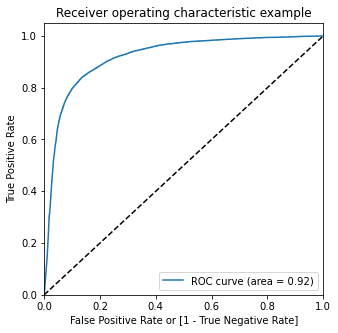

In [109]:
#lets draw roc curve
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [110]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.498805,0,1,1,1,1,1,0,0,0,0,0
1,0,0.010135,0,1,0,0,0,0,0,0,0,0,0
2,0,0.005659,0,1,0,0,0,0,0,0,0,0,0
3,0,0.098005,0,1,0,0,0,0,0,0,0,0,0
4,0,0.003968,0,1,0,0,0,0,0,0,0,0,0


In [111]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

In [112]:
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.726468  0.978241  0.474696
0.2   0.2  0.785610  0.957117  0.614102
0.3   0.3  0.817980  0.930126  0.705833
0.4   0.4  0.838712  0.901472  0.775952
0.5   0.5  0.848345  0.863479  0.833211
0.6   0.6  0.850374  0.822160  0.878588
0.7   0.7  0.841084  0.765439  0.916728
0.8   0.8  0.808273  0.669209  0.947338
0.9   0.9  0.661679  0.345215  0.978143


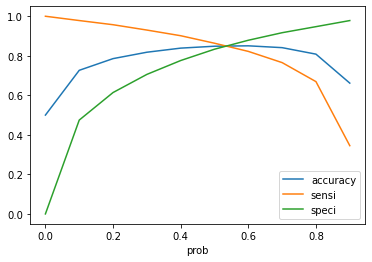

In [113]:
#lets plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

__Based on the above plot cut off point is around 0.55. But as we are predicting the Churn probabilities around cut off 0.4 we observe a good sensitivity/recall score.__ 

In [114]:
#apply cutoff probability 0.4
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.4 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.498805,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.010135,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.005659,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.098005,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.003968,0,1,0,0,0,0,0,0,0,0,0,0


In [115]:
#lets predict on train dataset with optimal cutoff probability
y_train_pred = lr_on_pca.predict_proba(X_train_pca)[:,1]
y_train_pred_final = pd.DataFrame({'Churn':y_train_smo, 'Churn_Prob':y_train_pred})
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.498805,1
1,0,0.010135,0
2,0,0.005659,0
3,0,0.098005,0
4,0,0.003968,0


In [116]:
#lets find out all scores of train dataset
#print all scores
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",(metrics.roc_auc_score(y_train_pred_final.Churn, y_train_pred_final.predicted)))
print('precision score:',(metrics.precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))

Roc_auc_score : 0.8387120434208596
precision score: 0.8009383960378834
Sensitivity/Recall : 0.901471810669405
Specificity: 0.7759522761723143
False Positive Rate: 0.22404772382768567
Positive predictive value: 0.8009383960378834
Negative Predictive value: 0.8873294564974279


In [117]:
#lets predict on test datset with optimal cutoff obtained earlier
y_test_pred = lr_on_pca.predict_proba(X_test_pca)[:,1]
y_test_pred_final = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_pred})
y_test_pred_final['Churn_Prob'] = y_test_pred
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.55 else 0)
y_test_pred_final.head()

,Churn,Churn_Prob,predicted
3267,0,0.319628,0
9423,1,0.566791,1
7375,0,0.074594,0
7774,0,0.920676,1
4953,0,0.939392,1


In [118]:
#lets find out all scores of test dataset
#print all scores
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",metrics.roc_auc_score(y_test_pred_final.Churn, y_test_pred_final.predicted))
print('precision score :',(metrics.precision_score(y_test_pred_final.Churn, y_test_pred_final.predicted)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))

Roc_auc_score : 0.8265773571492044
precision score : 0.34066901408450706
Sensitivity/Recall : 0.7995867768595041
Specificity: 0.8535679374389051
False Positive Rate: 0.1464320625610948
Positive predictive value: 0.34066901408450706
Negative Predictive value: 0.9782657405332735


__Final Model Score Analysis:__

1. __On test set it gives 82% accuracy which drops from 85% on train set.__
2. __Recall/Sensitivity on the test data is 79%, means model can correctly predicts 79% churned customers.__
3. __False positive rate is 15%__.

### 5.3 Applying Random Forest on PCA model

#### Random forest building with PCA

In [119]:
# settings initial parammeters
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}

# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_pca, y_train_smo)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [120]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8253875116131241 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 200}


__Grid Search CV gives best parameters for Random Forest Model :  'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 50, 'n_estimators': 200__

In [121]:
# model with the best hyperparameters
rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=100, 
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=300)

In [122]:
# Fit the model
rfc_model.fit(X_train_pca, y_train_smo)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=100,
                       min_samples_split=50, n_estimators=300)

In [123]:
# Predictions on the train set
y_train_pred = rfc_model.predict(X_train_pca)

In [124]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smo, y_train_pred)
print(confusion)

[[17148  3303]
 [ 3831 16620]]


In [125]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [126]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smo, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8255831010708523
Sensitivity:- 0.8126741968607892
Specificity:- 0.8384920052809154


Train model gives __82% accuracy__ and __81% sensitivity__. 

Fitting the model on test data

In [127]:
# Prediction on the test set
y_test_pred = rfc_model.predict(X_test_pca)

In [128]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4267  848]
 [ 121  363]]


In [129]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [130]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8269333809608859
Sensitivity:- 0.75
Specificity:- 0.8342130987292278


In [131]:
print('precision score :',(metrics.precision_score(y_test, y_test_pred)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))

precision score : 0.29975227085053674
False Positive Rate: 0.16578690127077225
Positive predictive value: 0.29975227085053674
Negative Predictive value: 0.9724247948951686


__Final Model Score Analysis:__

- __On test set it gives 82% accuracy which similar to train set.__
- __Recall/Sensitivity on the test data is 74%, means model can correctly predicts 74% churned customers.__

__Comparing Two Model with PCA ( Logistic Regression and Random Forest ) :__

- __Accuracy of both the model on test data is similar around 82%.__
- __Sensitivity/Recall score of Logistic Regression is 79% where as Sensitivity dropped in Random Forest Model to 74%.__

- __As we are predicting Churn, Sensitivity plays critical role here, though the accuracy is same for both the Model but Logistic Regression has higher possibility of predicting Churn Customer Correctly.__

### Model Building without PCA

We know PCA reduce dimension of the data set which can affect in identifying the major features in Churn Prediction. We might miss out some of the important features of Churn Prediction.

- So, we will try to build some models without PCA to get the feature importance and model accuracy as well.

### 5.4 Logistic Regression without PCA

In [132]:
#Using statsmodel GLM method for Logistic Regression
# Adding the constant to X_train
lr_no_pca = sma.GLM(y_train_smo,(sma.add_constant(X_train_smo)), family=sma.families.Binomial())

In [133]:
#fit the data
lr_no_pca = lr_no_pca.fit().summary()

In [134]:
#check summary
lr_no_pca

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                40902
Model:                            GLM   Df Residuals:                    40744
Model Family:                Binomial   Df Model:                          157
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14376.
Date:                Sat, 16 Jul 2022   Deviance:                       28753.
Time:                        21:51:44   Pearson chi2:                 1.08e+06
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0435      0.335     -0.130      0.897      -0.700       0.613
arpu_6                     3.0263      0.480      6.309      0.000       2.086       3.967
arpu_7                     0.5020      0.535      0.939      0.348      -0.546       1.550
arpu_8                     2.9421      0.596      4.939      0.000       1.775       4.110
onnet_mou_6               -0.7091      0.562     -1.262      0.207      -1.810       0.392
onnet_mou_7                0.7068      0.716      0.987      0.324      -0.697       2.110
onnet_mou_8               -1.7263      0.767     -2.250      0.024      -3.230      -0.222
offnet_mou_6               0.9318      0.516      1.805      0.071      -0.080       1.944
offnet_mou_7               1.5703      0.688      2.282      0.022       0.222       2.919
offnet_mou_8              -5.1932      0.656     -7.911      0.000      -6.480      -3.907
roam_ic_mou_6             -0.1875      0.185     -1.016      0.310      -0.549       0.174
roam_ic_mou_7              1.4836      0.222      6.694      0.000       1.049       1.918
roam_ic_mou_8             -1.1403      0.206     -5.546      0.000      -1.543      -0.737
roam_og_mou_6              0.1245      0.197      0.633      0.527      -0.261       0.510
roam_og_mou_7             -0.9733      0.209     -4.664      0.000      -1.382      -0.564
roam_og_mou_8              2.4477      0.225     10.899      0.000       2.008       2.888
loc_og_t2t_mou_6           0.1714      0.612      0.280      0.780      -1.029       1.372
loc_og_t2t_mou_7           2.5416      0.809      3.143      0.002       0.957       4.126
loc_og_t2t_mou_8          -7.1927      0.889     -8.095      0.000      -8.934      -5.451
loc_og_t2m_mou_6          -1.7907      0.650     -2.753      0.006      -3.066      -0.516
loc_og_t2m_mou_7           1.8195      0.809      2.249      0.025       0.234       3.405
loc_og_t2m_mou_8          -4.4223      0.851     -5.195      0.000      -6.091      -2.754
loc_og_t2f_mou_6          -0.4899      0.183     -2.683      0.007      -0.848      -0.132
loc_og_t2f_mou_7           0.6962      0.221      3.157      0.002       0.264       1.128
loc_og_t2f_mou_8          -0.2529      0.225     -1.126      0.260      -0.693       0.187
loc_og_t2c_mou_6          -0.4257      0.130     -3.264      0.001      -0.681      -0.170
loc_og_t2c_mou_7          -0.1569      0.149     -1.051      0.293      -0.449       0.136
loc_og_t2c_mou_8           0.6472      0.146      4.433      0.000       0.361       0.933
loc_og_mou_6               2.7583      1.084      2.546      0.011       0.635       4.882
loc_og_mou_7              -7.9998      1.357     -5.893      0.000     -10.660      -5.339
loc_og_mou_8              11.6516      1.402      8.309      0.000       8.903  

__Tunning the Model__

We'll first eliminate a few features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we can then use manual feature elimination (i.e. manually eliminating features based on observing the p-values and VIFs).

##### Feature Selection Using RFE

In [135]:
# initializing logistic regression model
logreg = LogisticRegression()

In [136]:
# Chosing 20 top features using RFE
rfe = RFE(logreg, 20)

In [137]:
# fitting train data in RFE Model
rfe = rfe.fit(X_train_smo, y_train_smo)

In [138]:
# top 20 features selected by RFE
top_cols = X_train_smo.columns[rfe.support_]
top_cols

Index(['arpu_6', 'arpu_8', 'offnet_mou_8', 'loc_og_t2t_mou_8', 'og_others_8',
       'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_7',
       'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'max_rech_data_8',
       'count_rech_2g_7', 'count_rech_2g_8', 'sachet_2g_7', 'aon', 'vbc_3g_8'],
      dtype='object')

__Model 1 with RFE__



In [139]:
# Adding constant to X_train
X_train_sm_1 = sma.add_constant(X_train_smo[top_cols])

#Instantiate the model
lr_no_pca_1 = sma.GLM(y_train_smo, X_train_sm_1, family=sma.families.Binomial())

# Fit the model
lr_no_pca_1 = lr_no_pca_1.fit()

lr_no_pca_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                40902
Model:                            GLM   Df Residuals:                    40881
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15581.
Date:                Sat, 16 Jul 2022   Deviance:                       31161.
Time:                        21:53:07   Pearson chi2:                 7.04e+05
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.6327      0.092      6.858      0.000       0.452       0.814
arpu_6                 2.3375      0.135     17.361      0.000       2.074       2.601
arpu_8                 1.8810      0.241      7.799      0.000       1.408       2.354
offnet_mou_8          -1.0278      0.108     -9.513      0.000      -1.240      -0.816
loc_og_t2t_mou_8      -2.9586      0.236    -12.539      0.000      -3.421      -2.496
og_others_8           -8.6751      3.794     -2.286      0.022     -16.112      -1.238
loc_ic_t2t_mou_7       2.5011      0.236     10.586      0.000       2.038       2.964
loc_ic_t2t_mou_8      -2.5214      0.609     -4.141      0.000      -3.715      -1.328
loc_ic_t2m_mou_7       2.8304      0.185     15.338      0.000       2.469       3.192
loc_ic_t2m_mou_8      -6.1934      0.737     -8.407      0.000      -7.637      -4.750
loc_ic_mou_8          -4.4153      0.958     -4.611      0.000      -6.292      -2.538
std_ic_mou_8          -1.8822      0.140    -13.473      0.000      -2.156      -1.608
spl_ic_mou_8          -3.3117      0.152    -21.761      0.000      -3.610      -3.013
total_rech_num_8      -3.1269      0.118    -26.483      0.000      -3.358      -2.896
last_day_rch_amt_8    -3.1798      0.111    -28.573      0.000      -3.398      -2.962
max_rech_data_8       -1.5375      0.087    -17.730      0.000      -1.707      -1.368
count_rech_2g_7       -4.4864      0.405    -11.080      0.000      -5.280      -3.693
count_rech_2g_8       -2.4183      0.124    -19.451      0.000      -2.662      -2.175
sachet_2g_7            4.8310      0.398     12.152      0.000       4.052       5.610
aon                   -1.7761      0.077    -22.932      0.000      -1.928      -1.624
vbc_3g_8              -1.7335      0.127    -13.619      0.000      -1.983      -1.484
======================================================================================
"""

Above summary shows p-values are almost zero for all the features except 'og_others_8'. Lets Check the VIF as well :

In [140]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_smo[top_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train_smo[top_cols].values, i) for i in range(X_train_smo[top_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,loc_ic_mou_8,39.06
15,count_rech_2g_7,39.04
17,sachet_2g_7,36.86
1,arpu_8,29.92
8,loc_ic_t2m_mou_8,24.95
0,arpu_6,16.01
6,loc_ic_t2t_mou_8,9.62
7,loc_ic_t2m_mou_7,4.75
12,total_rech_num_8,4.20
5,loc_ic_t2t_mou_7,3.55


Above VIF analysis shows some high VIF values present among features, which implies multi-collinearity presence. 

- __So first drop the first feature with high VIF i.e. 'loc_ic_mou_8'__

In [141]:
# Removing og_others_8 column 
log_cols = top_cols.to_list()
log_cols.remove('loc_ic_mou_8')
print(log_cols)

['arpu_6', 'arpu_8', 'offnet_mou_8', 'loc_og_t2t_mou_8', 'og_others_8', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'max_rech_data_8', 'count_rech_2g_7', 'count_rech_2g_8', 'sachet_2g_7', 'aon', 'vbc_3g_8']



__Model 2 with Updated Features__


In [142]:
# Adding constant to X_train
X_train_sm_2 = sma.add_constant(X_train_smo[log_cols])

#Instantiate the model
lr_no_pca_2 = sma.GLM(y_train_smo, X_train_sm_2, family=sma.families.Binomial())

# Fit the model
lr_no_pca_2 = lr_no_pca_2.fit()

lr_no_pca_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                40902
Model:                            GLM   Df Residuals:                    40882
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15594.
Date:                Sat, 16 Jul 2022   Deviance:                       31188.
Time:                        21:53:07   Pearson chi2:                 5.83e+05
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.6410      0.092      6.951      0.000       0.460       0.822
arpu_6                 2.3411      0.135     17.388      0.000       2.077       2.605
arpu_8                 1.8590      0.241      7.717      0.000       1.387       2.331
offnet_mou_8          -1.0185      0.108     -9.422      0.000      -1.230      -0.807
loc_og_t2t_mou_8      -2.8914      0.232    -12.469      0.000      -3.346      -2.437
og_others_8           -8.9188      3.882     -2.297      0.022     -16.527      -1.310
loc_ic_t2t_mou_7       2.4931      0.237     10.517      0.000       2.029       2.958
loc_ic_t2t_mou_8      -4.9759      0.324    -15.336      0.000      -5.612      -4.340
loc_ic_t2m_mou_7       2.8151      0.184     15.314      0.000       2.455       3.175
loc_ic_t2m_mou_8      -9.3325      0.281    -33.207      0.000      -9.883      -8.782
std_ic_mou_8          -1.8969      0.140    -13.585      0.000      -2.171      -1.623
spl_ic_mou_8          -3.3076      0.152    -21.746      0.000      -3.606      -3.009
total_rech_num_8      -3.0952      0.118    -26.278      0.000      -3.326      -2.864
last_day_rch_amt_8    -3.1773      0.111    -28.601      0.000      -3.395      -2.960
max_rech_data_8       -1.5468      0.087    -17.859      0.000      -1.717      -1.377
count_rech_2g_7       -4.5271      0.405    -11.192      0.000      -5.320      -3.734
count_rech_2g_8       -2.4254      0.124    -19.509      0.000      -2.669      -2.182
sachet_2g_7            4.8730      0.397     12.271      0.000       4.095       5.651
aon                   -1.7986      0.077    -23.300      0.000      -1.950      -1.647
vbc_3g_8              -1.7520      0.127    -13.770      0.000      -2.001      -1.503
======================================================================================
"""

In [143]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_smo[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train_smo[log_cols].values, i) for i in range(X_train_smo[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,count_rech_2g_7,39.03
16,sachet_2g_7,36.85
1,arpu_8,29.92
0,arpu_6,16.01
8,loc_ic_t2m_mou_8,4.85
7,loc_ic_t2m_mou_7,4.75
11,total_rech_num_8,4.19
6,loc_ic_t2t_mou_8,3.99
5,loc_ic_t2t_mou_7,3.54
2,offnet_mou_8,2.60


Above analysis shows still some high VIF values present among features, whereas p-values are almost zero for every features.

- __So now we drop the top feature with high VIF i.e. 'count_rech_2g_7' and 'arpu_8'__

In [144]:
# Removing offnet_mou_8 column
log_cols.remove('count_rech_2g_7')

In [145]:
# Removing arpu_8 column
log_cols.remove('arpu_8')

__Model 3 with Updated Features__

In [146]:
# Adding constant to X_train
X_train_sm_3 = sma.add_constant(X_train_smo[log_cols])

#Instantiate the model
lr_no_pca_3 = sma.GLM(y_train_smo, X_train_sm_3, family=sma.families.Binomial())

# Fit the model
lr_no_pca_3 = lr_no_pca_3.fit()

lr_no_pca_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                40902
Model:                            GLM   Df Residuals:                    40884
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15688.
Date:                Sat, 16 Jul 2022   Deviance:                       31376.
Time:                        21:53:08   Pearson chi2:                 4.79e+05
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.0136      0.066     15.326      0.000       0.884       1.143
arpu_6                 2.7783      0.130     21.410      0.000       2.524       3.033
offnet_mou_8          -0.6732      0.098     -6.886      0.000      -0.865      -0.482
loc_og_t2t_mou_8      -2.6736      0.225    -11.873      0.000      -3.115      -2.232
og_others_8           -8.5003      3.755     -2.263      0.024     -15.861      -1.140
loc_ic_t2t_mou_7       2.4461      0.235     10.411      0.000       1.986       2.907
loc_ic_t2t_mou_8      -4.9056      0.321    -15.288      0.000      -5.535      -4.277
loc_ic_t2m_mou_7       2.6579      0.182     14.587      0.000       2.301       3.015
loc_ic_t2m_mou_8      -9.1627      0.278    -32.948      0.000      -9.708      -8.618
std_ic_mou_8          -1.7702      0.138    -12.861      0.000      -2.040      -1.500
spl_ic_mou_8          -3.3386      0.152    -21.983      0.000      -3.636      -3.041
total_rech_num_8      -2.5564      0.100    -25.668      0.000      -2.752      -2.361
last_day_rch_amt_8    -2.8130      0.101    -27.853      0.000      -3.011      -2.615
max_rech_data_8       -1.5349      0.083    -18.418      0.000      -1.698      -1.372
count_rech_2g_8       -2.6514      0.125    -21.253      0.000      -2.896      -2.407
sachet_2g_7            0.5258      0.089      5.937      0.000       0.352       0.699
aon                   -1.7691      0.076    -23.155      0.000      -1.919      -1.619
vbc_3g_8              -1.8685      0.126    -14.816      0.000      -2.116      -1.621
======================================================================================
"""

In [147]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_smo[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train_smo[log_cols].values, i) for i in range(X_train_smo[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,loc_ic_t2m_mou_8,4.84
6,loc_ic_t2m_mou_7,4.74
5,loc_ic_t2t_mou_8,3.99
0,arpu_6,3.55
4,loc_ic_t2t_mou_7,3.54
10,total_rech_num_8,3.22
1,offnet_mou_8,2.39
13,count_rech_2g_8,2.25
15,aon,2.22
12,max_rech_data_8,1.97


Now all the p-values are tends to Zero and we have VIF less than 5 for all the features. 

- __Considering this as a final model to test.__

__Model performance Train Set__

In [148]:
# Getting the predicted value on the train set
y_train_pred_no_pca = lr_no_pca_3.predict(X_train_sm_3)
y_train_pred_no_pca.head()

0    0.121214
1    0.011625
2    0.014682
3    0.142028
4    0.000789
dtype: float64

In [149]:
y_train_pred_final = pd.DataFrame({'churn':y_train_smo.values, 'churn_prob':y_train_pred_no_pca.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,0.121214,0
1,0,0.011625,1
2,0,0.014682,2
3,0,0.142028,3
4,0,0.000789,4


In [150]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.121214,0,1,1,0,0,0,0,0,0,0,0
1,0,0.011625,1,1,0,0,0,0,0,0,0,0,0
2,0,0.014682,2,1,0,0,0,0,0,0,0,0,0
3,0,0.142028,3,1,1,0,0,0,0,0,0,0,0
4,0,0.000789,4,1,0,0,0,0,0,0,0,0,0


In [151]:
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.718253     0.977996     0.458511
0.2          0.2  0.770158     0.951836     0.588480
0.3          0.3  0.804019     0.928365     0.679673
0.4          0.4  0.824996     0.898636     0.751357
0.5          0.5  0.838785     0.864945     0.812625
0.6          0.6  0.840986     0.812870     0.869102
0.7          0.7  0.829837     0.743876     0.915799
0.8          0.8  0.795878     0.639578     0.952178
0.9          0.9  0.646765     0.308004     0.985526


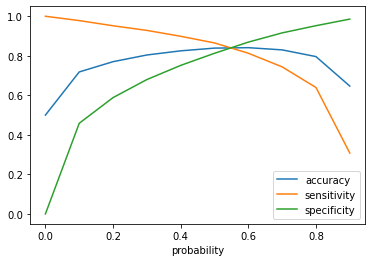

In [152]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

__Based on the above plot cut off point is around 0.55. But as we are predicting the Churn probabilities around cut off 0.45 we observe a good sensitivity/recall score.__

In [153]:
# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.45 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.121214,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.011625,1,1,0,0,0,0,0,0,0,0,0,0
2,0,0.014682,2,1,0,0,0,0,0,0,0,0,0,0
3,0,0.142028,3,1,1,0,0,0,0,0,0,0,0,0
4,0,0.000789,4,1,0,0,0,0,0,0,0,0,0,0


In [154]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[16029  4422]
 [ 2392 18059]]


In [155]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [156]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8334066793799815
Sensitivity:- 0.8830375042785193
Specificity:- 0.7837758544814435


In [157]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

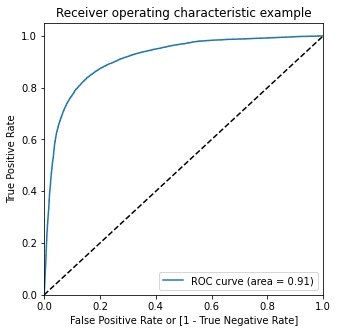

In [158]:
#plotting the ROC curve
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

Fitting data on the test set

In [159]:
# Taking a copy of the test set
X_test_log = X_test.copy()

In [160]:
# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables
X_test_log = X_test_log[log_cols]

In [161]:
# Adding constant on the test set
X_test_sm = sma.add_constant(X_test_log)

In [162]:
y_test_pred = lr_no_pca_3.predict(X_test_sm)

In [163]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3267,0.215556
9423,0.648603
7375,0.045879
7774,0.915089
4953,0.888102


In [164]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn_probability
3267,0
9423,1
7375,0
7774,0
4953,0


In [165]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [166]:
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [167]:
# Appending y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [168]:
y_test_pred_final.head()

,churn_probability,CustID,0
0,0,3267,0.215556
1,1,9423,0.648603
2,0,7375,0.045879
3,0,7774,0.915089
4,0,4953,0.888102


In [169]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

In [170]:
# Rearranging the columns
y_test_pred_final = y_test_pred_final.reindex(columns=['CustID','churn_probability','churn_prob'])

In [171]:
y_test_pred_final.head()

,CustID,churn_probability,churn_prob
0,3267,0,0.215556
1,9423,1,0.648603
2,7375,0,0.045879
3,7774,0,0.915089
4,4953,0,0.888102


In [172]:
# In the test set using probablity cutoff 0.45, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.45 else 0)

In [173]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['churn_probability'], y_test_pred_final['test_predicted'])
print(confusion)

[[4044 1071]
 [  83  401]]


In [174]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [175]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test_pred_final['churn_probability'], y_test_pred_final['test_predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.7938917663868548
Sensitivity:- 0.8285123966942148
Specificity:- 0.7906158357771261


__Final Model Score Analysis:__

- __On test set it gives 79% accuracy.__
- __Recall/Sensitivity on the test data is 83%, means model can correctly predicts 83% churned customers.__
- __Model shows improvement on prediction part of Churn as Sensitivity is raised to 83%.__

__Deriving the TOP 10 features from the above Model__

In [176]:
# Top 10 predictors
abs(lr_no_pca_3.params).sort_values(ascending=False)[0:11]

loc_ic_t2m_mou_8      9.162657
og_others_8           8.500255
loc_ic_t2t_mou_8      4.905641
spl_ic_mou_8          3.338606
last_day_rch_amt_8    2.812961
arpu_6                2.778306
loc_og_t2t_mou_8      2.673579
loc_ic_t2m_mou_7      2.657879
count_rech_2g_8       2.651367
total_rech_num_8      2.556371
loc_ic_t2t_mou_7      2.446059
dtype: float64

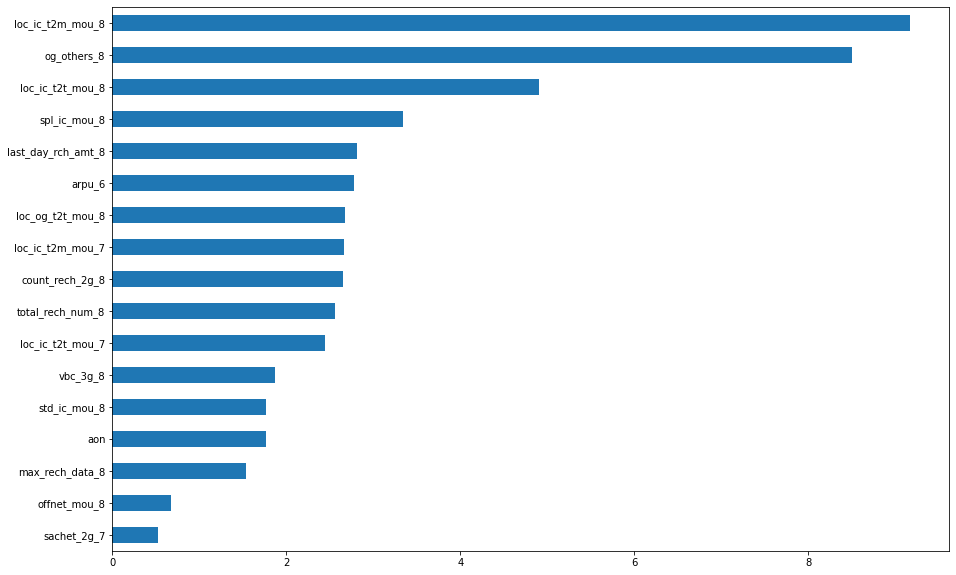

In [177]:
# Plotting the features
plt.figure(figsize=(15,10))
impo_features = pd.Series(abs(lr_no_pca_3.params), index=X.columns)
impo_features.nlargest((25)).sort_values().plot(kind='barh', align='center')
plt.show()

__Top 10 features of the Logistic Regression Model with out PCA is as follows:__

- loc_ic_t2m_mou_8   
- og_others_8         
- loc_ic_t2t_mou_8   
- spl_ic_mou_8      
- last_day_rch_amt_8   
- arpu_6               
- loc_og_t2t_mou_8     
- loc_ic_t2m_mou_7      
- count_rech_2g_8      
- total_rech_num_8     
- loc_ic_t2t_mou_7     

### 5.6 Decision Tree Model

In [178]:
# Initial classifier
intial_dt = DecisionTreeClassifier(random_state=42, max_depth=10)
intial_dt.fit(X_train_smo, y_train_smo)

# Train Accuracy
y_train_pred = intial_dt.predict(X_train_smo)
print(f'Train accuracy : {metrics.accuracy_score(y_train_smo, y_train_pred)}')

y_test_pred = intial_dt.predict(X_test)

# Print the report on test data
print(metrics.classification_report(y_test, y_test_pred))

Train accuracy : 0.9525206591364725
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      5115
           1       0.40      0.73      0.52       484

    accuracy                           0.88      5599
   macro avg       0.69      0.81      0.72      5599
weighted avg       0.92      0.88      0.90      5599



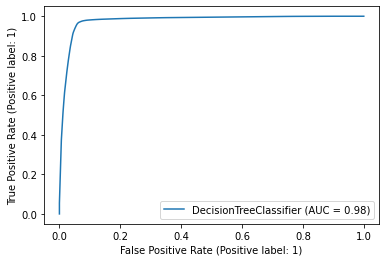

In [179]:
# Plot ROC curve
plot_roc_curve(intial_dt, X_train_smo, y_train_smo, drop_intermediate=False)
plt.show()

__To get better performance performing the Hyper parameter tunning on the model to find best parameters:__

In [180]:
dt = DecisionTreeClassifier(random_state=42)

In [181]:
# Define parameters
params = {
    "max_depth": [2, 3, 5, 10, 20, 30, 40, 50, 100],
    "min_samples_leaf": [5, 10, 20, 50, 100, 250, 500, 800, 1000],
    "min_samples_leaf" : [1, 5, 10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

# Perform gridsearch
grid_search.fit(X_train_smo, y_train_smo)

Fitting 4 folds for each of 54 candidates, totalling 216 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30, 40, 50, 100],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [182]:
# get the best score
grid_search.best_score_

0.9169482076704618

In [183]:
# Best estimator
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=20, random_state=42)

__For Decesion Tree model with max_depth=20, gives us the best model.__

In [184]:
# predicting using the best model
y_train_pred = dt_best.predict(X_train_smo)
y_test_pred = dt_best.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      5115
           1       0.39      0.67      0.49       484

    accuracy                           0.88      5599
   macro avg       0.68      0.78      0.71      5599
weighted avg       0.92      0.88      0.89      5599



__Model gives:__

- Accuracy around 88%
- Recall/Sensitivity is around 88%
- F1-Score of the Model is around 89%

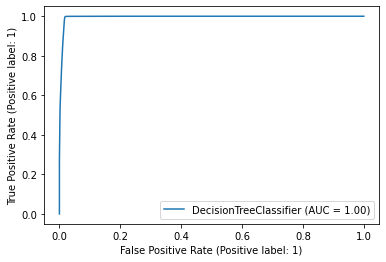

In [185]:
# ROC
plot_roc_curve(dt_best, X_train_smo, y_train_smo)
plt.show()

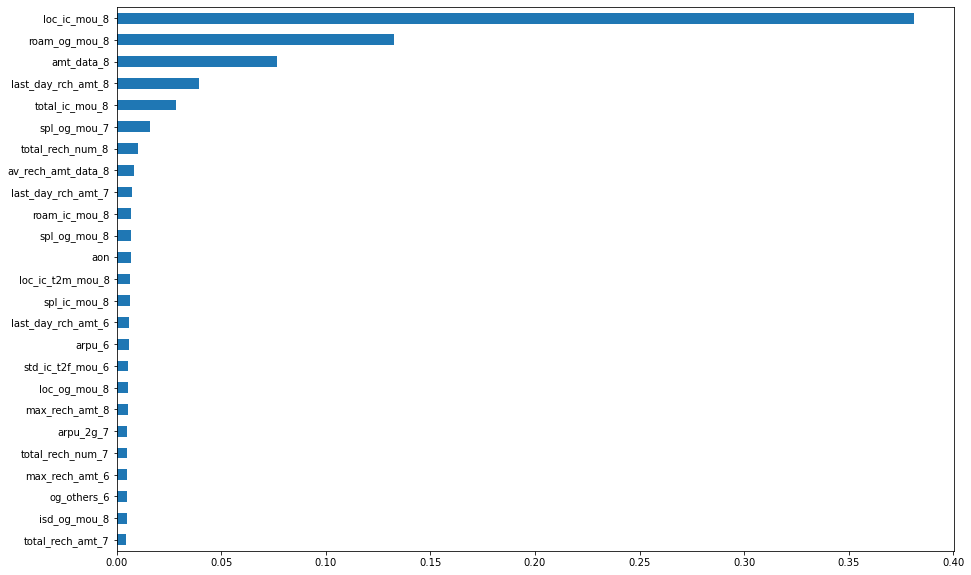

In [186]:
plt.figure(figsize=(15,10))
impo_features = pd.Series(dt_best.feature_importances_, index=X.columns)
impo_features.nlargest((25)).sort_values().plot(kind='barh', align='center')
plt.show()

__Above plot shows top 25 important features derived based on Decision Tree Model.__

### 5.7 Random Forest Model without PCA

In [187]:
# initial random forest model
rf = RandomForestClassifier(n_estimators=15, max_depth=10, max_features=5, random_state=25, oob_score=True)
rf.fit(X_train_smo, y_train_smo)

RandomForestClassifier(max_depth=10, max_features=5, n_estimators=15,
                       oob_score=True, random_state=25)

In [188]:
# predicting on train data
y_train_pred = rf.predict(X_train_smo)

In [189]:
# Train Accuracy
y_train_pred = rf.predict(X_train_smo)
print(f'Train accuracy : {metrics.accuracy_score(y_train_smo, y_train_pred)}')

Train accuracy : 0.944354799276319


In [190]:
# prediction on test data
y_test_pred = rf.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      5115
           1       0.47      0.71      0.57       484

    accuracy                           0.91      5599
   macro avg       0.72      0.82      0.76      5599
weighted avg       0.93      0.91      0.91      5599



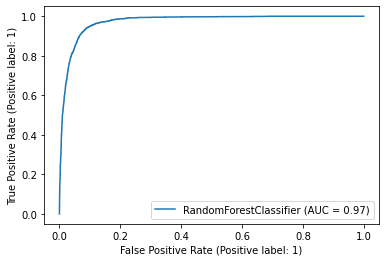

In [191]:
# Plotting ROC
plot_roc_curve(rf, X_train, y_train)
plt.show()

__Hyper parameter tuning to get the best params for the Random Forest Model__

In [192]:
rf = RandomForestClassifier(random_state=25, n_jobs=-1)

# Define parameters
params = {
    'max_depth': [2, 3, 5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'n_estimators': [10, 25, 50, 100]
}

In [193]:
%time
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Wall time: 0 ns
Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=25),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [194]:
# best score
grid_search.best_score_

0.941418110376853

In [195]:
# fetching the best estimator
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_jobs=-1,
                       random_state=25)

__Best parameters for the Random Forest Models are : max_depth=5, min_samples_leaf=5, n_jobs=-1,
                       random_state=25__

In [196]:
# prediction on the best params model
y_train_pred = rf_best.predict(X_train_smo)
y_test_pred = rf_best.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5115
           1       0.77      0.50      0.61       484

    accuracy                           0.94      5599
   macro avg       0.86      0.74      0.79      5599
weighted avg       0.94      0.94      0.94      5599



__Model score analysis:__

- __Accuracy 94% and F1-score is 97 for positive and 61 for negative predictions which gives us a very stable model with good scores.__
- __Recall/sensitivity is around 94%, implies that model predicts 94% of the Churn Customers correctly. Which is a very good result.__

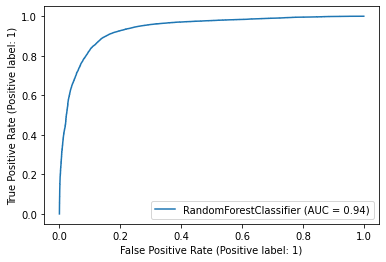

In [197]:
plot_roc_curve(rf_best, X_train_smo, y_train_smo)
plt.show()

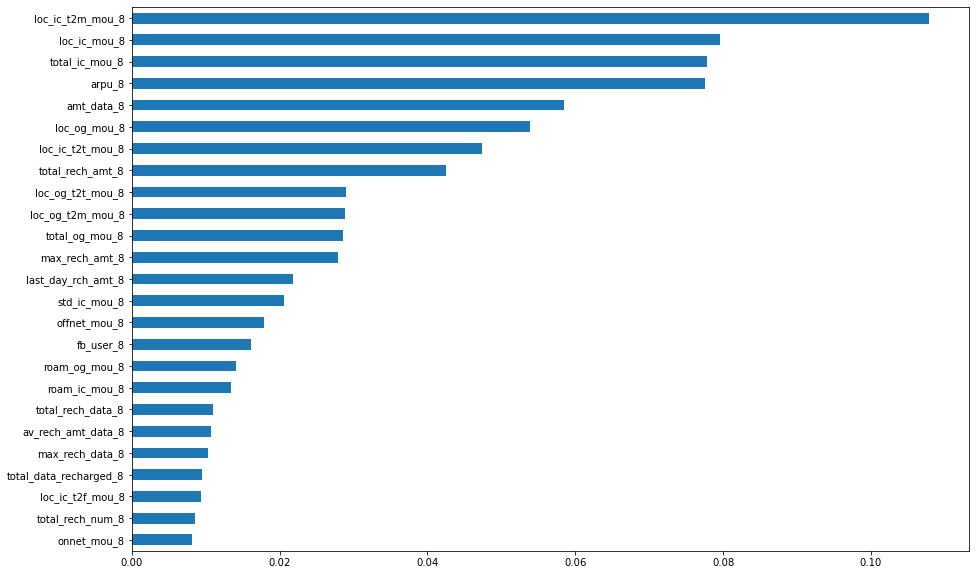

In [198]:
# plotting the top 25 important features
plt.figure(figsize=(15,10))
impo_features = pd.Series(rf_best.feature_importances_, index=X.columns)
impo_features.nlargest((25)).sort_values().plot(kind='barh', align='center')
plt.show()

__FINAL MODEL SELECTION__

Observing all the model scores and performances we came to following conclusion :

- __We achieved better performance score in non PCA model specially in tree modes ( Decision Tree and Random Forest)__
- __Random Forest Model with out PCA gives us best accuracy of 94% with high recall and F1 score as well.__
- __For other models with PCA accuracy seems to be dropping of when tested on test data.__

__So we will be taking Random Forest Model with out PCA as our Final Model.We will be deriving top driving features from the model and also will be using the model for prediction on unseen test data.__

_-Top 15 features derived from Random Forest Model-_

In [199]:
final_model_cols = impo_features.nlargest((15)).index
final_model_cols

Index(['loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8', 'arpu_8',
       'amt_data_8', 'loc_og_mou_8', 'loc_ic_t2t_mou_8', 'total_rech_amt_8',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'total_og_mou_8',
       'max_rech_amt_8', 'last_day_rch_amt_8', 'std_ic_mou_8', 'offnet_mou_8'],
      dtype='object')

### Top important features for Churn Prediction is as follows:

1. 'loc_ic_t2m_mou_8' : Local Incoming calls Operator T to other operator mobile Minutes of usage - voice calls in 8th Month
2. 'loc_ic_mou_8': Local Incoming calls Minutes of usage - voice calls in 8th Month 
3. 'total_ic_mou_8' : Total incoming calls Minutes of usage - voice calls in 8th Month
4. 'arpu_8' : Average revenue per user in 8th Month
5. 'amt_data_8': Amount of data in 8th month
6. 'loc_og_mou_8': Local Outgoing calls Minutes of usage - voice calls in 8th Month
7. 'loc_ic_t2t_mou_8': Local Incoming calls Operator T to operator T mobile Minutes of usage - voice calls in 8th Month 
8. 'total_rech_amt_8':total number of data recharges done in the month 8
9. 'loc_og_t2t_mou_8': Local Outgoing calls Operator T to operator T mobile Minutes of usage - voice calls in 8th Month 
10. 'loc_og_t2m_mou_8': Local Outgoing calls Operator T to other operator mobile Minutes of usage - voice calls in 8th Month
11. 'total_og_mou_8': Total Outgoing calls Minutes of usage - voice calls in 8th Month
12. 'max_rech_amt_8': Max recharge amount in 8th mont
13. 'last_day_rch_amt_8':  Last recharge amount in 8th month.
14. 'std_ic_mou_8': STD incoming calls in 8th month
15. 'offnet_mou_8': All kind of calls outside the operator T network Minutes of usage - voice calls in 8th Month

### Recommend strategies and Suggestions to prevent or reduce Customer Churn:

- Important factors that Telecommunication company should monitor is already mentioned above.

- Number of Incoming and outgoing calls from a mobile number in particular month by customer. If number of calls starts reducing then it may be sign of customer trying to switch from one network to another network or he is has already switched and using  current network for few days.

- Recharge amount is very important factor to notice if it starts reducing month by month then it need to be looked as customer may not be happy with the services he is getting that is why he started recharging with less amount.

- If data usage starts decreasing and in august month it is minimal then it shows customer is not getting good speed of internet.

- If internet speed that customer is getting is good, customer will finish data soon and recharge it again but if network is poor and speed is not good then customer will not be able to finish it and will not recharge it multiple times. so need to look into areas where network is poor and customer care is receiving complaints multiple times.

- if all kinds of call and data usage reduces then it is serious concern as customer may be planning to churn and just time passing for few more days. so company need to look into these ares.

- if customer is using the services for incoming calls only and has stopped using outgoing calls then he is finding the services very costly and may switch to network where incoming and outgoing services are in reasonable rate.

### Above Business decisions will play critical role in predicting or preventing Customer churn for a Telecommunication Company.

### 6. As another business objective we will be performing prediction of final model on unseen test Data

In [200]:
# Loading the dataset into a data frame
unseen_test = pd.read_csv('test.csv')
unseen_test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [201]:
unseen_test.shape

(30000, 171)

In [202]:
#copying the data set in another data frame
test_data = unseen_test.copy()
test_data.shape

(30000, 171)

Data set have 30000 records and 171 columns

__Performing the Data Cleaning and EDA steps to prepare the Data__

In [203]:
#mapping the inccorect column names
test_data = test_data.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8'})

Analysis on recharge related columns:

In [204]:
recharge_columns =  test_data.columns[test_data.columns.str.contains('rech_amt|rech_data')]
print(recharge_columns)

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8'],
      dtype='object')


In [205]:
test_data[recharge_columns].isnull().sum()

total_rech_amt_6                0
total_rech_amt_7                0
total_rech_amt_8                0
max_rech_amt_6                  0
max_rech_amt_7                  0
max_rech_amt_8                  0
date_of_last_rech_data_6    22415
date_of_last_rech_data_7    22294
date_of_last_rech_data_8    22078
total_rech_data_6           22415
total_rech_data_7           22294
total_rech_data_8           22078
max_rech_data_6             22415
max_rech_data_7             22294
max_rech_data_8             22078
av_rech_amt_data_6          22415
av_rech_amt_data_7          22294
av_rech_amt_data_8          22078
dtype: int64

In [206]:
# recharge columns to impute zero
columns_recharge_impute = ['total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8','av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8']

test_data[columns_recharge_impute] = test_data[columns_recharge_impute].apply(lambda x: x.fillna(0))

In [207]:
test_data[recharge_columns].isnull().sum()

total_rech_amt_6                0
total_rech_amt_7                0
total_rech_amt_8                0
max_rech_amt_6                  0
max_rech_amt_7                  0
max_rech_amt_8                  0
date_of_last_rech_data_6    22415
date_of_last_rech_data_7    22294
date_of_last_rech_data_8    22078
total_rech_data_6               0
total_rech_data_7               0
total_rech_data_8               0
max_rech_data_6                 0
max_rech_data_7                 0
max_rech_data_8                 0
av_rech_amt_data_6              0
av_rech_amt_data_7              0
av_rech_amt_data_8              0
dtype: int64

In [208]:
# Dropping the columns 
id_col = ["circle_id","id"]
date_cols = object_cols

In [209]:
test_data = test_data.drop(id_col + date_cols, axis=1)

In [210]:
test_data.shape

(30000, 160)

In [211]:
categry_cols =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']

# replace missing values with '-1' in categorical columns
test_data[categry_cols] = test_data[categry_cols].apply(lambda x: x.fillna(-1))

In [212]:
# imputing the respective null columns as 0. 
test_data[test_data.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()] = test_data[test_data.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()].fillna(0, axis=1)

In [213]:
round((test_data.isnull().sum() / len(test_data.index))*100,2).sort_values(ascending=False)

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
last_day_rch_amt_6    0.0
last_day_rch_amt_7    0.0
last_day_rch_amt_8    0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
count_rech_2g_6       0.0
count_rech_2g_7       0.0
total_rech_num_8      0.0
total_rech_num_7      0.0
total_rech_num_6      0.0
total_ic_mou_8        0.0
std_ic_t2o_mou_7      0.0
std_ic_t2o_mou_8      0.0
std_ic_mou_6          0.0
std_ic_mou_7          0.0
std_ic_mou_8          0.0
total_ic_mou_6        0.0
total_ic_mou_7        0.0
spl_ic_mou_6          0.0
ic_others_8           0.0
spl_ic_mou_7          0.0
spl_ic_mou_8          0.0
isd_ic_mou_6          0.0
isd_ic_mou_7          0.0
isd_ic_mou_8          0.0
ic_others_6           0.0
ic_others_7 

In [214]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 160 entries, loc_og_t2o_mou to vbc_3g_6
dtypes: float64(135), int64(25)
memory usage: 36.6 MB


In [215]:
# for the month of June, July and August
test_data['total_data_recharged_6'] = test_data.total_rech_data_6 * test_data.av_rech_amt_data_6
test_data['total_data_recharged_7'] = test_data.total_rech_data_7 * test_data.av_rech_amt_data_7
test_data['total_data_recharged_8'] = test_data.total_rech_data_8 * test_data.av_rech_amt_data_8

In [216]:
# Total recharge amount for June,July and August
test_data['amt_data_6'] = test_data.total_rech_amt_6 + test_data.total_data_recharged_6
test_data['amt_data_7'] = test_data.total_rech_amt_7 + test_data.total_data_recharged_7
test_data['amt_data_8'] = test_data.total_rech_amt_8 + test_data.total_data_recharged_8

In [217]:
#List of columns with only 1 unqiue value
col_list = test_data.loc[:,test_data.apply(pd.Series.nunique) == 1]
col_list.head(5)

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [218]:
#dropping columns with only one unique value
test_data = test_data.loc[:,test_data.apply(pd.Series.nunique) != 1]
test_data.shape

(30000, 157)

__Scaling the unseen data on same scaler before predicting the output__

In [219]:
#Scalling
test_data = scaler.transform(test_data)

__Predicting the churn probability on the unseen data using Best Random Forest Model without PCA for prediction__

In [220]:
#predicting the result
unseen_test['churn_probability'] = rf_best.predict(test_data)
output = unseen_test[['id','churn_probability']]
output.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


__Storing the output in Submission.csv file__

In [221]:
# creating output csv file
output.to_csv('Submission',index=False)

- __As per case study objective we have predicted top 15 features from the given data dictionary which can help in business terms for Churn prediction.__

- __Also we have predicted the Churn Probability on the Unseen test data using the best Model and stored the output in a CSV file.__

============================================== END ==================================